In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as stats
import os
from pathlib import Path
import natsort as S
from natsort import natsort_keygen
natsort_key = natsort_keygen()
import random



def importer(sFname, bgFname, epoch_size):

    SignalDat1 = sFname[:epoch_size]
    SignalDat = SignalDat1.sample(frac=1)
    s_len = len(SignalDat["BPM0_X"])
    s_labels = np.zeros(s_len)
    #################################
    BgDat1 = bgFname[:epoch_size]
    BgDat = BgDat1.sample(frac=1)
    b_len = len(BgDat["BPM0_X"])
    b_labels = np.ones(b_len)

    signalData = np.float32(SignalDat)
    bgData = np.float32(BgDat)


    #print(signalData)

    t_features = np.concatenate((signalData[:int(s_len/2.)], bgData[:int(b_len/2.)]))
    v_features = np.concatenate((signalData[int(s_len/2.):], bgData[int(b_len/2.):]))
    t_labels = np.concatenate((s_labels[:int(s_len/2.)], b_labels[:int(b_len/2.)]))
    v_labels = np.concatenate((s_labels[int(s_len/2.):], b_labels[int(b_len/2.):]))


    Tra = list(zip(t_features, t_labels)) # same mixing on two arrays

    random.shuffle(Tra)

    t_features, t_labels = zip(*Tra)

    Val = list(zip(v_features, v_labels))
    
    random.shuffle(Val)
    
    v_features, v_labels = zip(*Val)

    return t_features, t_labels, v_features, v_labels


def merge(dfs:list[pd.DataFrame], targetColumn:'str|tuple[str]'):
    from functools import reduce
    if len(dfs) == 0:
        return None
    if len(dfs) == 1:
        return dfs[0]
    for df in dfs:
        df.index = pd.to_datetime(df.index)
    merged = reduce(
        lambda left, right: pd.merge(
            left,
            right,
            how='outer',
            left_index=True,
            right_index=True),
        dfs)
    for col in merged.columns:
        if col != targetColumn:
            merged[col] = merged[col].fillna(method='ffill')
    return merged[merged[targetColumn].notna()]

def looper(filesx = list(),slector = int(),d = list()):
    for i, j in enumerate(filesx):
        #print(i,j)
        datas = pd.read_csv(j,nrows = slector)
        #data['file'] = f'File {i}'
        d.append(datas)
        #del data
    #return d
    del i,j

from scipy.fft import fft, fftfreq

def pos_ploter(panda, panda1, panda2, panda3, panda4, panda5, panda6, panda7, panda8, BPM_name, case, case1, case2, case3, case4, case5, case6, case7, case8, big):

    path = f'/home/jbiernat/ML_BPM/POS/{str(big)}/{BPM_name[-1]}/'
    os.makedirs(path,exist_ok=True)

    plt.rc('figure',figsize=(15,5))
    plt.title(f'{BPM_name}')
    plt.plot(panda[BPM_name],label=f'{BPM_name} {case}')
    plt.plot(panda1[BPM_name],label=f'{BPM_name} {case1}')
    plt.plot(panda2[BPM_name],label=f'{BPM_name} {case2}')
    plt.plot(panda3[BPM_name],label=f'{BPM_name} {case3}')
    plt.plot(panda4[BPM_name],label=f'{BPM_name} {case4}')
    plt.plot(panda5[BPM_name],label=f'{BPM_name} {case5}')
    plt.plot(panda6[BPM_name],label=f'{BPM_name} {case6}')
    plt.plot(panda7[BPM_name],label=f'{BPM_name} {case7}')
    plt.plot(panda8[BPM_name],label=f'{BPM_name} {case8}')
    plt.xlabel("Time [0.1 ms]", size=12)
    plt.ylabel("Position [Arb. Units]", size=12)
    plt.legend()
    plt.savefig(f'/home/jbiernat/ML_BPM/POS/{str(big)}/{BPM_name[-1]}/{BPM_name}_position_{str(big)}.png')
    plt.show()

def plot_Gaus(panda, panda1, panda2, panda3, panda4, panda5, panda6, panda7, panda8, BPM_name, case, case1, case2, case3, case4, case5, case6, case7, case8, big):

    path1 = f'/home/jbiernat/ML_BPM/GAUSS/{str(big)}/{BPM_name[-1]}/'
    os.makedirs(path1,exist_ok=True)

    mean_panda = np.mean(panda[BPM_name])
    std_panda = np.std(panda[BPM_name])

    mean_panda1 = np.mean(panda1[BPM_name])
    std_panda1 = np.std(panda1[BPM_name])

    mean_panda2 = np.mean(panda2[BPM_name])
    std_panda2 = np.std(panda2[BPM_name])

    mean_panda3 = np.mean(panda3[BPM_name])
    std_panda3 = np.std(panda3[BPM_name])

    mean_panda4 = np.mean(panda4[BPM_name])
    std_panda4 = np.std(panda4[BPM_name])

    mean_panda5 = np.mean(panda5[BPM_name])
    std_panda5 = np.std(panda5[BPM_name])

    mean_panda6 = np.mean(panda6[BPM_name])
    std_panda6 = np.std(panda6[BPM_name])

    mean_panda7 = np.mean(panda7[BPM_name])
    std_panda7 = np.std(panda7[BPM_name])

    mean_panda8 = np.mean(panda8[BPM_name])
    std_panda8 = np.std(panda8[BPM_name])
    
    pdf_panda = stats.norm.pdf(panda[BPM_name].sort_values(), mean_panda, std_panda)
    pdf_panda1 = stats.norm.pdf(panda1[BPM_name].sort_values(), mean_panda1, std_panda1)
    pdf_panda2 = stats.norm.pdf(panda2[BPM_name].sort_values(), mean_panda2, std_panda2)
    pdf_panda3 = stats.norm.pdf(panda3[BPM_name].sort_values(), mean_panda3, std_panda3)
    pdf_panda4 = stats.norm.pdf(panda4[BPM_name].sort_values(), mean_panda4, std_panda4)
    pdf_panda5 = stats.norm.pdf(panda5[BPM_name].sort_values(), mean_panda5, std_panda5)
    pdf_panda6 = stats.norm.pdf(panda6[BPM_name].sort_values(), mean_panda6, std_panda6)
    pdf_panda7 = stats.norm.pdf(panda7[BPM_name].sort_values(), mean_panda7, std_panda7)
    pdf_panda8 = stats.norm.pdf(panda8[BPM_name].sort_values(), mean_panda8, std_panda8)
    # Drawing a graph
    plt.title(f'PDF of {BPM_name}')
    plt.rc('figure',figsize=(20,5))
    plt.plot(panda[BPM_name].sort_values(), pdf_panda, label=f'{BPM_name} {case}')
    plt.plot(panda1[BPM_name].sort_values(), pdf_panda1, label=f'{BPM_name} {case1}')
    plt.plot(panda2[BPM_name].sort_values(), pdf_panda2, label=f'{BPM_name} {case2} ')
    plt.plot(panda3[BPM_name].sort_values(), pdf_panda3, label=f'{BPM_name} {case3}')
    plt.plot(panda4[BPM_name].sort_values(), pdf_panda4, label=f'{BPM_name} {case4}')
    plt.plot(panda5[BPM_name].sort_values(), pdf_panda5, label=f'{BPM_name} {case5}')
    plt.plot(panda6[BPM_name].sort_values(), pdf_panda6, label=f'{BPM_name} {case6}')
    plt.plot(panda7[BPM_name].sort_values(), pdf_panda7, label=f'{BPM_name} {case7}')
    plt.plot(panda8[BPM_name].sort_values(), pdf_panda8, label=f'{BPM_name} {case8}')
    #plt.xlim([30,70])  
    plt.xlabel("Position Sorted", size=12)
    plt.ylabel("Probability", size=12)
    plt.legend()
    #plt.grid(True, alpha=0.3, linestyle="--")
    #plt.yscale("log")
    name =[x for x in globals() if globals()[x] is panda][0]
    plt.savefig(f'/home/jbiernat/ML_BPM/GAUSS/{str(big)}/{BPM_name[-1]}/{BPM_name}_{name}_{str(big)}_PDF.png')

    plt.show()
    #return std_panda, std_panda2, std_panda3, std_panda4  

def plot_FFT(panda,BPM_name,case,name,big):

    path2 = f'/home/jbiernat/ML_BPM/FFT/{str(big)}/{BPM_name[-1]}/'
    os.makedirs(path2,exist_ok=True)

    plt.title(f'FFT of {BPM_name} {name}')
    T = 100
    y = panda[BPM_name]
    N = len(y)
    yf = fft(y)
    xf = fftfreq(N,  d=1.0/T)
    plt.plot(xf, 0.5*np.abs(yf)/N)
    plt.grid()
    plt.yscale("log")
    plt.savefig(f'/home/jbiernat/ML_BPM/FFT/{str(big)}/{BPM_name[-1]}/{BPM_name}_FFT_{name}_{str(big)}.png')
    plt.show()


def pos2FFT(panda: pd.DataFrame, BPM_name, name, cutoff, func_test=False) -> pd.DataFrame:
    
    Y, F = _wrapfft(panda[BPM_name])   # calculate fft for chosen BPM
    Y_cut, F_cut = _subsetfft(Y, F, (3,cutoff)) # subset fft to desired frequency range 
    panda_fft = pd.DataFrame({BPM_name:Y_cut})  # create new DataFrame with subset fft

    #plt.plot(F_cut, Y_cut)
    #plt.grid()
    #plt.yscale("log")
    #plt.show()
    
    return panda_fft

# wrapper for fft and frequency vectors calculation
def _wrapfft(x: np.ndarray, fs: float = 10000) -> tuple[np.ndarray, np.ndarray]:
    N = len(x)
    y = 0.5*np.abs(np.fft.fft(x))/N  # calculate fft vector
    f = fftfreq(N, d=1.0/fs) # calculate frequency vector
    return (y,f)

# subset fft & frequency vectors based on cutoff frequencies
def _subsetfft(y: np.ndarray, f: np.ndarray, cutoff: tuple[float, float]) -> tuple[np.ndarray ,np.ndarray]:
    idx_mask = np.where((f >= cutoff[0]) & (f <= cutoff[1])) # get indices based on cutoff values
    f_cut = f[idx_mask]
    y_cut = y[idx_mask]
    return (y_cut, f_cut)
 


def plot_FFT_diff(panda,panda1,BPM_name,case,name,big):

    path2 = f'/home/jbiernat/ML_BPM/FFT/{str(big)}/{BPM_name[-1]}/'
    os.makedirs(path2,exist_ok=True)

    plt.title(f'FFT of {BPM_name} {name}')
    ax = plt.gca()
    ax.set_xlim([0, 2.5])
    #ax.set_ylim([0, 20])
    
    T = 100
    
    y = panda[BPM_name]
    N = len(y)
    yf = fft(y)
    xf = fftfreq(N,  d=1.0/T)

    y1 = panda1[BPM_name]
    yf1 = fft(y1)

    plt.plot(xf, 0.5*np.abs(np.abs(yf) - np.abs(yf1))/N)
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    
    plt.grid()
    plt.yscale("log")
    plt.savefig(f'/home/jbiernat/ML_BPM/FFT/{str(big)}/{BPM_name[-1]}/{BPM_name}_FFT_DIFF_{name}_{str(big)}.png')
    plt.show()

def diffFFT(panda1,panda2,name):

    path44 = f'/home/jbiernat/ML_BPM/FFT/SHAKE/'
    os.makedirs(path44,exist_ok=True)

    keyjs = panda1.keys()
    #display(panda1.head(10))
    #print('............................')
    #display(panda2.head(10))
    for j, i in enumerate(keyjs):
        plt.title(f'FFT shaken / FFT raw {name} {i}')
        plt.plot(np.arange(0,len(panda1)), np.abs(panda1[i] / panda2[i]) )
        plt.axhline(y = 1, color = 'r', linestyle = '-')
        plt.grid()
        plt.yscale("log")
        plt.savefig(f'/home/jbiernat/ML_BPM/FFT/SHAKE/{i}_FFT_RATIO_{name}.png')
        plt.show()
        
def normalizer(input):
    #norm = (input-input.mean())/input.std()
    #norm = input.apply(lambda x: x - input.mean(axis = 1))
    norm = (input-input.min())/(input.max()-input.min())
    del input
    return norm

def classPloter(predi,nn,big):
    x_axis1 = range(0, len(predi))
    plt.rc('figure',figsize=(15,5))
    #plt.plot(predi[0],x_axis1,label='signal-like')
    plt.plot(predi,x_axis1,label='bacground-like',alpha=0.5)
    #plt.plot(predi)
    plt.xlabel("Score", size=12)
    plt.ylabel("Time [0.1 ms]", size=12)
    name =[x for x in globals() if globals()[x] is nn][0]
    plt.savefig(f'/home/jbiernat/ML_BPM/classification_BDT_{str(name)}_{str(big)}.png')
    plt.show()


def ValPlotter(results,aa,big):
    epochs = len(results['validation_0'])
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(results['validation_0']['logloss'], label='Train')
    ax.plot(results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('LogLoss')
    plt.xlabel('N Estimators')
    plt.title('XGBoost AUC')
    name =[x for x in globals() if globals()[x] is aa][0]
    plt.savefig(f'/home/jbiernat/ML_BPM/LogLoss_{str(name)}_{str(big)}.png')
    plt.show()

def anomaly_ploter(panda, panda1, BPM_name, big, cut):
    name =[x for x in globals() if globals()[x] is panda1][0]
    print(str(name))
    pathx = f'/home/jbiernat/ML_BPM/POS/XGB/{str(big)}/{str(name)}/{BPM_name[-1]}/'
    print(pathx)
    os.makedirs(pathx,exist_ok=True)
    
    plt.rc('figure',figsize=(15,5))
    x = panda.loc[panda['Prob'] < cut, BPM_name]
    y = panda1[BPM_name]
    plt.title(f'{BPM_name}')
    plt.plot(x,label='bacground-like',alpha=0.9)
    plt.plot(y,label='bacground',alpha=0.5)
    plt.legend()
    plt.ylabel("Pos", size=12)
    plt.xlabel("Time [0.1 ms]", size=12)
    plt.savefig(f'/home/jbiernat/ML_BPM/POS/XGB/{str(big)}/{str(name)}/{BPM_name[-1]}/{BPM_name}_positionXGB_{str(big)}_{str(cut)}_{str(name)}.png')
    plt.show()

def plot_distribution(Predict,Predict1,anomaly):
    from itertools import accumulate
    x_pr = np.array(Predict, dtype=np.float64)
    x_pr1 = np.array(Predict1, dtype=np.float64)
    df = pd.DataFrame((x_pr[:,1] > anomaly))
    df1 = df.apply(pd.value_counts)
    df1_T = df1.T
    xlims = [0, 1]
    # ylims = [0, slector/20]
    ylims = [10**0,10**3]
    plt.rc('figure',figsize=(15,5))
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.semilogy(x_pr)
    
    plt.hist(x_pr[:,1], bins=100, label = 'operation day 15-02-2024 Time 12:49, I = 306 mA' )
    #plt.hist(x_pr1[:,1], alpha = 0.5,bins=100, label = 'distortion test')
    plt.axvline(x=anomaly, color='b', label='anomaly threshold',linewidth=3.0)
    #plt.title(f'{BPM_name}')
    plt.xlabel("Score")
    plt.ylabel("Num of Score")
    plt.legend(loc="upper left")
    # plt.savefig(fr'ML_BPM/{BPM_name}-hist.png')
    plt.show()

    plt.rc('figure',figsize=(15,5)) 
    fig, ax = plt.subplots()
    ax.bar('GOOD',height = df1_T[False])
    ax.bar('BAD',height = df1_T[True])
    #ax.plot(results['validation_1']['logloss'], label='Test')
    #ax.legend()
    plt.ylabel('Time Interval')
    plt.xlabel('Calisfication')
    plt.title('Anomaly')
    plt.show()

def calculate_tune(pos_x, pos_y):
    fft_length = len(pos_x) // 2  # only half will be taken into account due to Nyquist

    # Calculate FFT and cut data to fft_length
    fft_h = abs(np.fft.fft(pos_x - np.mean(pos_x)))[:fft_length] / 1e6
    fft_v = abs(np.fft.fft(pos_y - np.mean(pos_y)))[:fft_length] / 1e6
    freq_base = np.linspace(0, .5, num=fft_length)

    # Everything below those indexes is considered noise
    noise_cut_idx_h = 90
    noise_cut_idx_v = 110

    # Find index of maximum fft value
    max_tune_idx_h = np.argmax(fft_h[noise_cut_idx_h:]) + noise_cut_idx_h
    max_tune_idx_v = np.argmax(fft_v[noise_cut_idx_v:]) + noise_cut_idx_v

    # Tune as fft peak frequency value
    tune_h = freq_base[max_tune_idx_h]
    tune_v = freq_base[max_tune_idx_v]

    return tune_h, tune_v, fft_h, fft_v, freq_base

In [2]:
path = r'/home/jbiernat/DANE/at/24_01_2024_unstableRF/'  # or unix / linux / mac path
path1 = r'/home/jbiernat/DANE/at/24_01_2024_clean2/'
path2 = r'/home/jbiernat/DANE/at/24_01_2024_distorted/'
path3 = r'/mnt/cifs_share/cav1coldring200mA_orbit/'
path4 = r'/mnt/cifs_share/cav2coldring250mA_1_12_02_2023_orbit'
path5 = r'/mnt/cifs_share/operation_all_day_15_02_24_hour_12_49_orbit/'
path6 = r'/mnt/cifs_share/operation_all_day_15_02_2024_hour_15_58_orbit/'
path7 = r'/mnt/cifs_share/shake/shake1_orbit/'
path8 = r'/mnt/cifs_share/shake/clean_shake_orbit/'
path9 = r'/mnt/cifs_share/shake/shaker_6_05_2023_sofb_fofb_orbit/'
# Get the files from the path provided in the OP
files  = S.natsorted(Path(path).glob('*.csv'), key = natsort_key)  # .rglob to get subdirectories
files1 = S.natsorted(Path(path1).glob('*.csv'), key = natsort_key)
files2 = S.natsorted(Path(path2).glob('*.csv'), key = natsort_key)
files3 = S.natsorted(Path(path3).glob('*.csv'), key = natsort_key)
files4 = S.natsorted(Path(path4).glob('*.csv'), key = natsort_key)
files5 = S.natsorted(Path(path5).glob('*.csv'), key = natsort_key)
files6 = S.natsorted(Path(path6).glob('*.csv'), key = natsort_key)
files7 = S.natsorted(Path(path7).glob('*.csv'), key = natsort_key)
files8 = S.natsorted(Path(path8).glob('*.csv'), key = natsort_key)
files9 = S.natsorted(Path(path9).glob('*.csv'), key = natsort_key)
dfs = list()
dfs1 = list()
dfs2 = list()
dfs3 = list()
dfs4 = list()
dfs5 = list()
dfs6 = list()
dfs7 = list()
dfs8 = list()
dfs9 = list()
slector = 10000 # 250000 25000 ms -> 25 s
#print(files)

looper(files,slector,dfs)
looper(files1,slector,dfs1)
looper(files2,slector,dfs2)
looper(files3,slector,dfs3)
looper(files4,slector,dfs4)
looper(files5,slector,dfs5)
looper(files6,slector,dfs6)
looper(files7,slector,dfs7)
looper(files8,slector,dfs8)
looper(files9,slector,dfs9)

RF_DIST = merge(dfs, targetColumn=('GIZMO'))
RF_DIST.drop('GIZMO', axis=1, inplace=True)
SIG = merge(dfs1, targetColumn=('GIZMO'))
SIG.drop('GIZMO', axis=1, inplace=True)
MAG_DIST = merge(dfs2, targetColumn=('GIZMO'))
MAG_DIST.drop('GIZMO', axis=1, inplace=True)
COLD_CAV1DIST = merge(dfs3, targetColumn=('DUMMY'))
COLD_CAV2DIST = merge(dfs4, targetColumn=('DUMMY'))
OPR = merge(dfs5, targetColumn=('DUMMY'))
OPR1 = merge(dfs6, targetColumn=('DUMMY'))
SHAKE = merge(dfs7, targetColumn=('DUMMY'))
SHAKEC = merge(dfs8, targetColumn=('DUMMY'))
SHAKECOR = merge(dfs9, targetColumn=('DUMMY'))
badCol = list()
badCol  = ['DUMMY','COUNTER','DUMMY1','COUNTER1','DUMMY2','COUNTER2','DUMMY3','COUNTER3','DUMMY4','COUNTER4','DUMMY5',
           'COUNTER5','DUMMY6','COUNTER6','DUMMY7','COUNTER7','DUMMY8','COUNTER8','DUMMY9','COUNTER9','DUMMY10',
           'COUNTER10','DUMMY11','COUNTER11']

for g, h in enumerate(badCol):
    COLD_CAV1DIST.drop(h, axis=1, inplace=True)
    COLD_CAV2DIST.drop(h, axis=1, inplace=True)
    OPR.drop(h, axis=1, inplace=True)
    OPR1.drop(h, axis=1, inplace=True)
    SHAKEC.drop(h, axis=1, inplace=True)
    SHAKE.drop(h, axis=1, inplace=True)
    SHAKECOR.drop(h, axis=1, inplace=True)

UnboundLocalError: cannot access local variable 'i' where it is not associated with a value

In [ ]:
RF_DIST.insert(0, 'New_ID', range(0, 0 + len(RF_DIST)))
RF_DIST = RF_DIST.set_index('New_ID')
#display(RF_DIST.head(10))
SIG.insert(0, 'New_ID', range(0, 0 + len(SIG)))
SIG = SIG.set_index('New_ID')
#display(SIG.head(10))
MAG_DIST.insert(0, 'New_ID', range(0, 0 + len(MAG_DIST)))
MAG_DIST = MAG_DIST.set_index('New_ID')
#display(MAG_DIST.head(10))
COLD_CAV1DIST.insert(0, 'New_ID', range(0, 0 + len(COLD_CAV1DIST)))
COLD_CAV1DIST = COLD_CAV1DIST.set_index('New_ID')
#display(COLD_CAV1DIST.head(10))
COLD_CAV2DIST.insert(0, 'New_ID', range(0, 0 + len(COLD_CAV2DIST)))
COLD_CAV2DIST = COLD_CAV2DIST.set_index('New_ID')
#display(COLD_CAV2DIST.head(10))
OPR.insert(0, 'New_ID', range(0, 0 + len(OPR)))
OPR = OPR.set_index('New_ID')
OPR1.insert(0, 'New_ID', range(0, 0 + len(OPR)))
OPR1 = OPR1.set_index('New_ID')
SHAKE.insert(0, 'New_ID', range(0, 0 + len(SHAKE)))
SHAKE = SHAKE.set_index('New_ID')
SHAKEC.insert(0, 'New_ID', range(0, 0 + len(SHAKEC)))
SHAKEC = SHAKEC.set_index('New_ID')
SHAKECOR.insert(0, 'New_ID', range(0, 0 + len(SHAKECOR)))
SHAKECOR = SHAKECOR.set_index('New_ID')

In [ ]:
c1 = "CAV 2 power drop, I = 400mA"
c2 = "clean, I = 400mA"
c3 = "ID distortion I = 400mA"
c4 = "cold ring CAV 1 power drop, I = 200 mA"
c5 = "cold ring CAV 2 power drop, I = 250 mA"
c6 = "operation day 15-02-2024 Time 12:49, I = 306 mA"
c7 = "operation day 15-02-2024 Time 15:58, I = 236 mA"
c8 = "shake"
c9 = "clean no corr run"
c10 = "clean corr run"
keyGen = list()
keyGen = RF_DIST.keys()
# raw plotting
cut = 2500000
shake_fft = pd.DataFrame()
noshake_fft = pd.DataFrame()
opr1_fft = pd.DataFrame()
opr_fft = pd.DataFrame()
shakecor_fft = pd.DataFrame()
rf_dist_fft = pd.DataFrame()
shake_fft.insert(0, 'New_ID', range(0, 0 + len(SHAKE)))
noshake_fft.insert(0, 'New_ID', range(0, 0 + len(SHAKEC)))
opr1_fft.insert(0, 'New_ID', range(0, 0 + len(OPR1)))
opr_fft.insert(0, 'New_ID', range(0, 0 + len(OPR)))
shakecor_fft.insert(0, 'New_ID', range(0, 0 + len(SHAKECOR)))
rf_dist_fft.insert(0, 'New_ID', range(0, 0 + len(RF_DIST)))
shake_fft = shake_fft.set_index('New_ID')
noshake_fft = noshake_fft.set_index('New_ID')
opr1_fft = opr1_fft.set_index('New_ID')
opr_fft = opr_fft.set_index('New_ID')
shakecor_fft = shakecor_fft.set_index('New_ID')
rf_dist_fft = rf_dist_fft.set_index('New_ID')
#display(SHAKE.head(10))
for j, i in enumerate(keyGen):
    #print(j,i)
    #shake_fft = shake_fft.merge(pos2FFT(SHAKE,i,slector, cut),left_on = 'New_ID',right_index = True)
    #noshake_fft = noshake_fft.merge(pos2FFT(SHAKEC,i,slector, cut),left_on = 'New_ID',right_index = True)
    opr1_fft = opr1_fft.merge(pos2FFT(OPR1,i,slector, cut),left_on = 'New_ID',right_index = True)
    opr_fft = opr_fft.merge(pos2FFT(OPR,i,slector, cut),left_on = 'New_ID',right_index = True)
    shakecor_fft = shakecor_fft.merge(pos2FFT(SHAKECOR,i,slector, cut),left_on = 'New_ID',right_index = True)
    shake_fft = shake_fft.merge(pos2FFT(SHAKE,i,slector, cut), left_on = 'New_ID',right_index = True)
    rf_dist_fft = rf_dist_fft.merge(pos2FFT(RF_DIST,i,slector, cut), left_on = 'New_ID',right_index = True)
    #noshake_fft.merge(pos2FFT(,i,slector, cut), left_on = 'New_ID', right_index = True)
    #pos_ploter(RF_DIST,SIG,MAG_DIST,COLD_CAV1DIST,COLD_CAV2DIST,OPR,OPR1,SHAKE,SHAKEC,i,c1,c2,c3,c4,c5,c6,c7,c8,c9,slector)
    #plot_Gaus(RF_DIST,SIG,MAG_DIST,COLD_CAV1DIST,COLD_CAV2DIST,OPR,OPR1,SHAKE,SHAKEC,i,c1,c2,c3,c4,c5,c6,c7,c8,c9,slector)
    #plot_FFT(SIG,i,c2,'SIG',slector)
    #plot_FFT(RF_DIST,i,c1,'RF_DIST',slector)
    #plot_FFT(MAG_DIST,i,c3,'MAG_DIST',slector)
    #plot_FFT(COLD_CAV1DIST,i,c4,'COLD_CAV1DIST',slector)
    #plot_FFT(COLD_CAV2DIST,i,c5,'COLD_CAV2DIST',slector)
    #plot_FFT(OPR,i,c6,'OPR',slector)
    #plot_FFT(OPR1,i,c7,'OPR1',slector)
    #plot_FFT(SHAKE,i,c8,'SHAKE',slector)
    #plot_FFT(SHAKEC,i,c9,'SHAKE REFF',slector)
    #plot_FFT_diff(SHAKEC,SHAKE,i,c10,'SHAKE - REFF',slector)
# norm plot
print('After Normalization')
#display(shake_fft.head())

nRF_DIST = normalizer(RF_DIST)
nSIG = normalizer(SIG)
nMAG_DIST = normalizer(MAG_DIST)
nCOLD_CAV1DIST = normalizer(COLD_CAV1DIST)
nCOLD_CAV2DIST = normalizer(COLD_CAV2DIST)
nOPR = normalizer(OPR)
nOPR1 = normalizer(OPR1)
nSHAKE = normalizer(SHAKE)
nSHAKEC = normalizer(SHAKEC)
#diffFFT(shake_fft,noshake_fft,'noCORR')
#diffFFT(opr1_fft,shakecor_fft,'CORR')
#diffFFT(opr_fft,shakecor_fft,'CORR1')
#for j, i in enumerate(keyGen):
    #print(j,i)
    #plot_Gaus(nRF_DIST,nSIG,nMAG_DIST,nCOLD_CAV1DIST,nCOLD_CAV2DIST,nOPR,nOPR1,nSHAKE,nSHAKEC,i,c1,c2,c3,c4,c5,c6,c7,c8,c9,slector)

In [3]:
#Size = 450000
#display(nSHAKE.keys())
Signal = opr_fft
Background = rf_dist_fft
Predict = opr1_fft
#Background1 = noshake_fft
(train, tlabels, validate, vlabels) = importer(sFname = Signal, bgFname = Background, epoch_size = slector)
#import tensorflow as tf
from xgboost import XGBClassifier
params = dict(n_estimators=600, learning_rate=0.01, max_depth=10, tree_method='exact', subsample=0.2, colsample_bytree=0.2, colsample_bynode=0.2, gamma=1, reg_lambda=1, random_state=121, objective='binary:logistic')
bst = XGBClassifier(**params)
bst.fit(train, tlabels, eval_set=[(train, tlabels), (validate, vlabels)], verbose=0)

NameError: name 'opr_fft' is not defined

In [4]:
Predict = opr1_fft
Predict1 = shake_fft
results = bst.evals_result()

#print(results)
    
#np.savetxt("train_test.csv", results, delimiter=",")
ValPlotter(results,Background,slector)
y_pred = bst.predict_proba(Predict[0:1000])#[:,0]
np.savetxt("Oper_score.csv", y_pred, delimiter=",")
y_pred1 = bst.predict_proba(Predict1[0:1000])#[:,0]
np.savetxt("shake_score.csv", y_pred1, delimiter=",")
#y_pred = bst.predict_proba(Predict)
#classPloter(y_pred,Background,slector)
plot_distribution(y_pred,y_pred1,0.7)
#plot_distribution(y_pred1)
print(bst.classes_)

NameError: name 'opr1_fft' is not defined

In [7]:
import pickle
#OPR.insert(1, 'Prob',y_pred )
#for j, i in enumerate(keyGen):
    #anomaly_ploter(OPR,Background1,i,slector,0.3)

#OPR.drop('Prob', axis=1, inplace=True)

filename = 'RF_MODEL.sav'
pickle.dump(bst, open(filename, 'wb'))

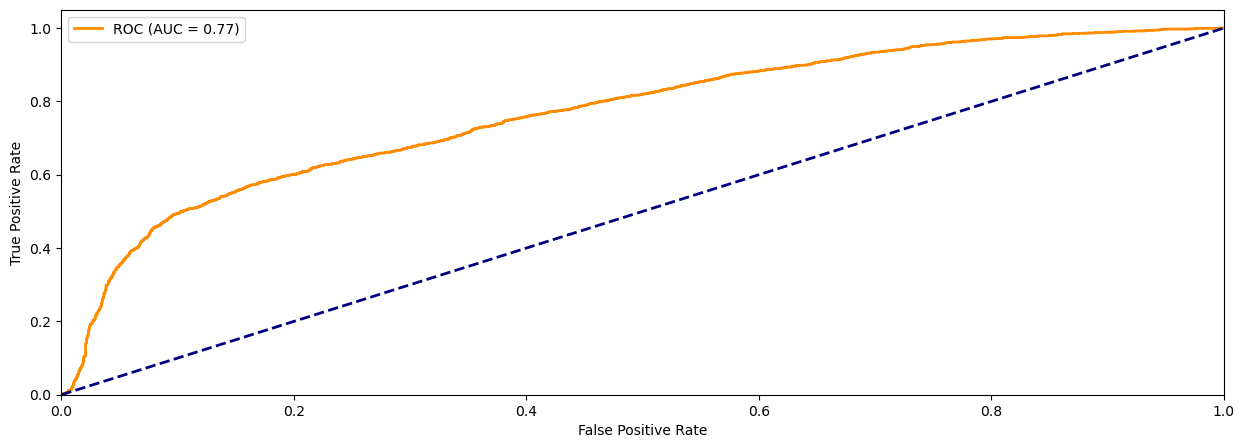

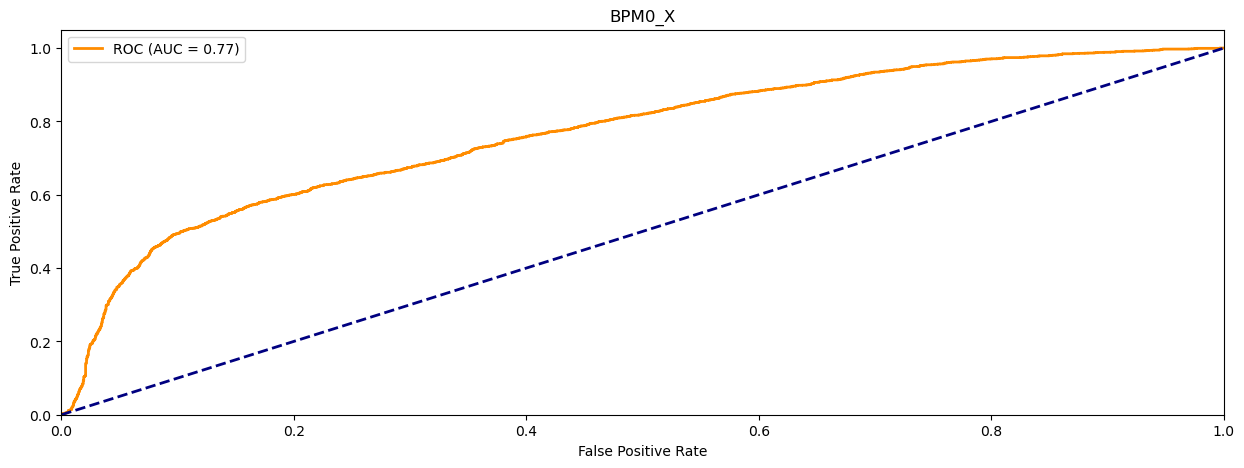

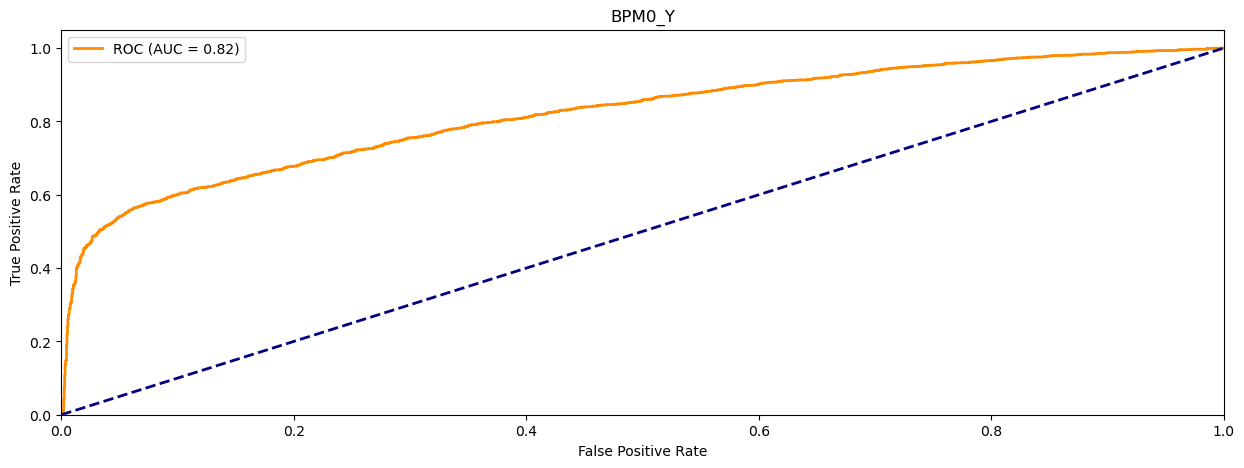

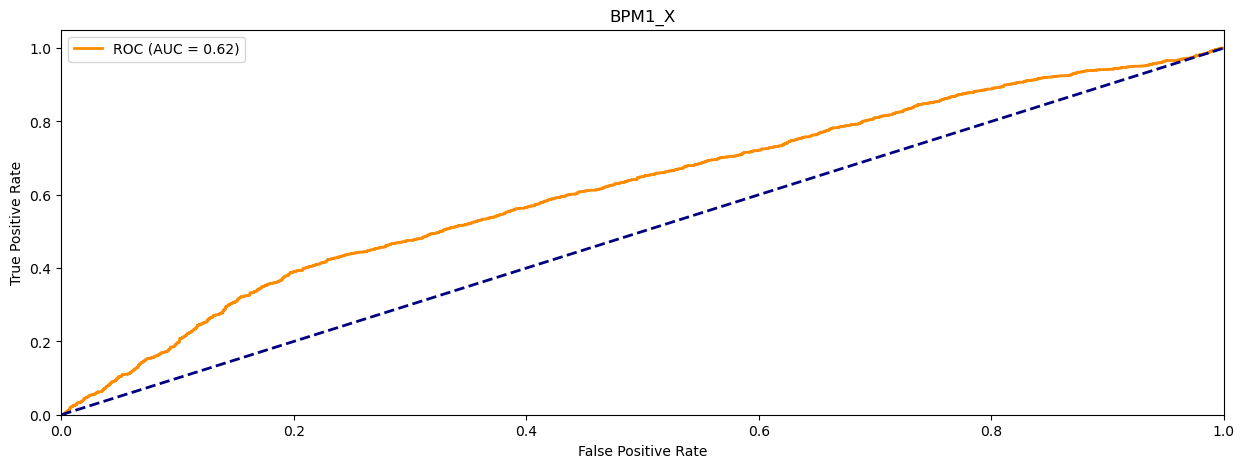

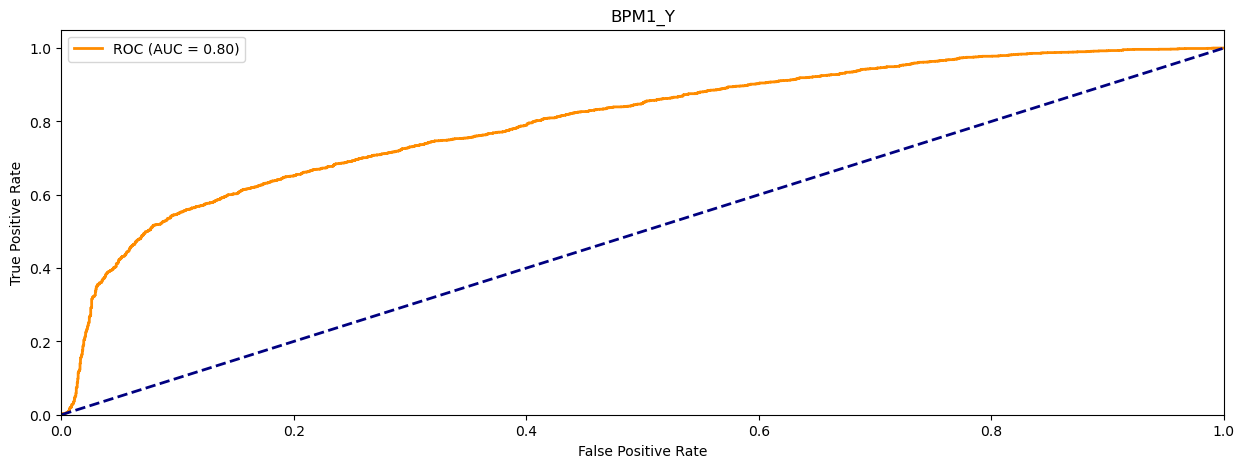

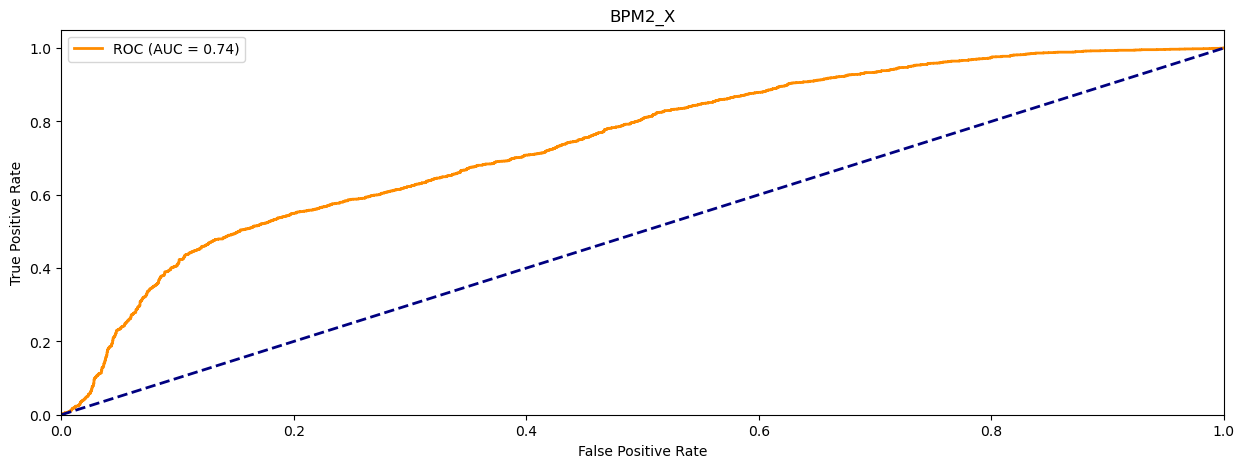

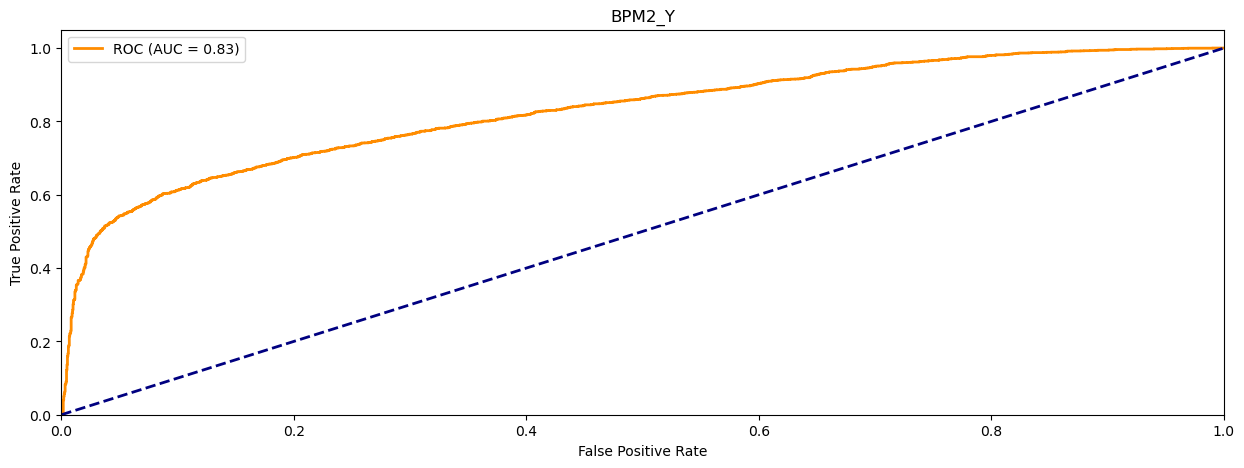

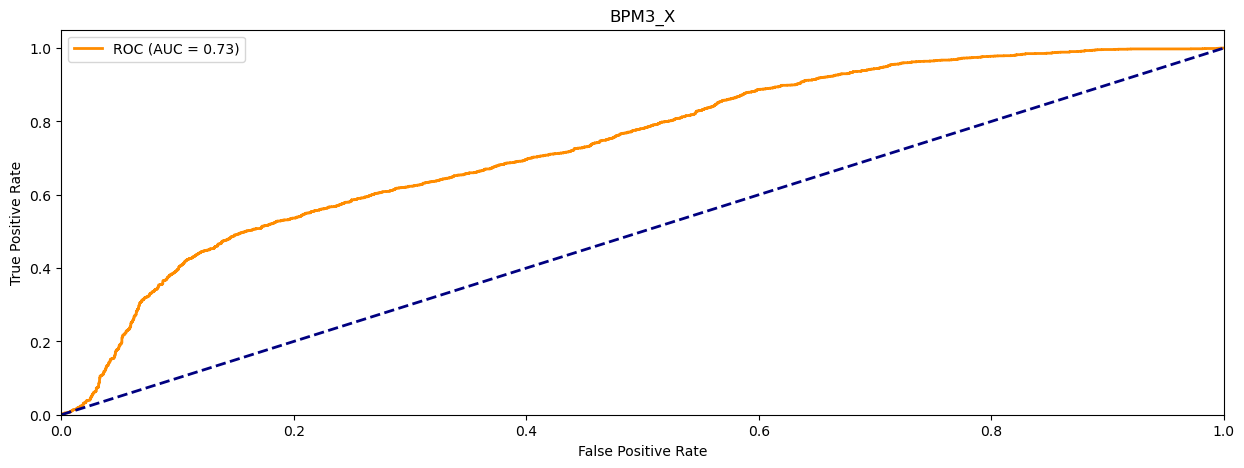

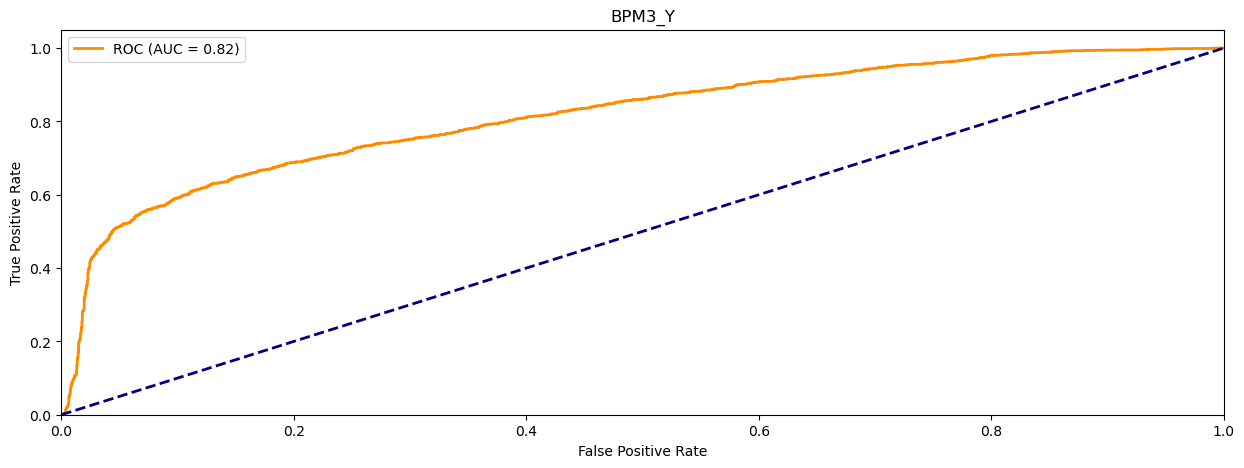

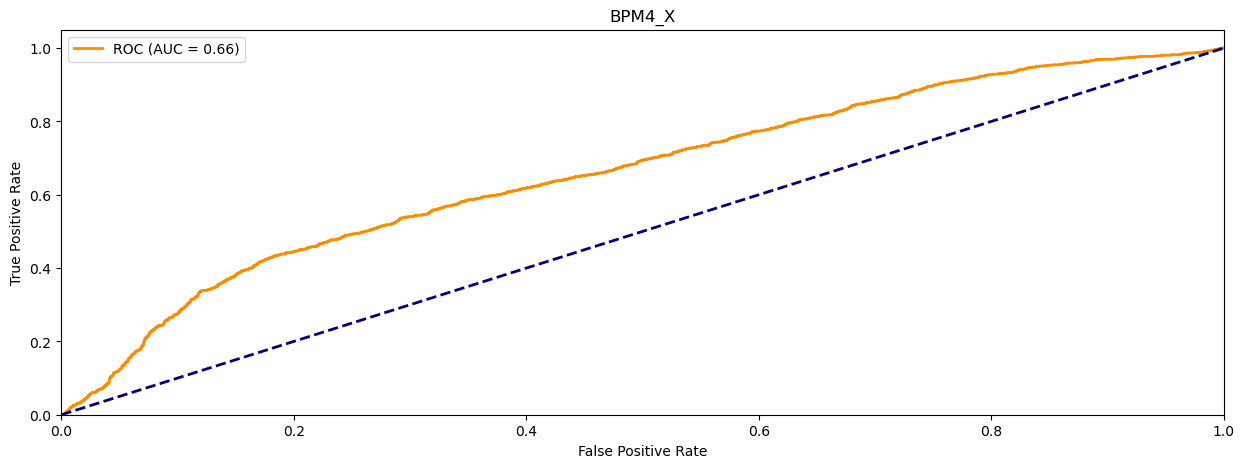

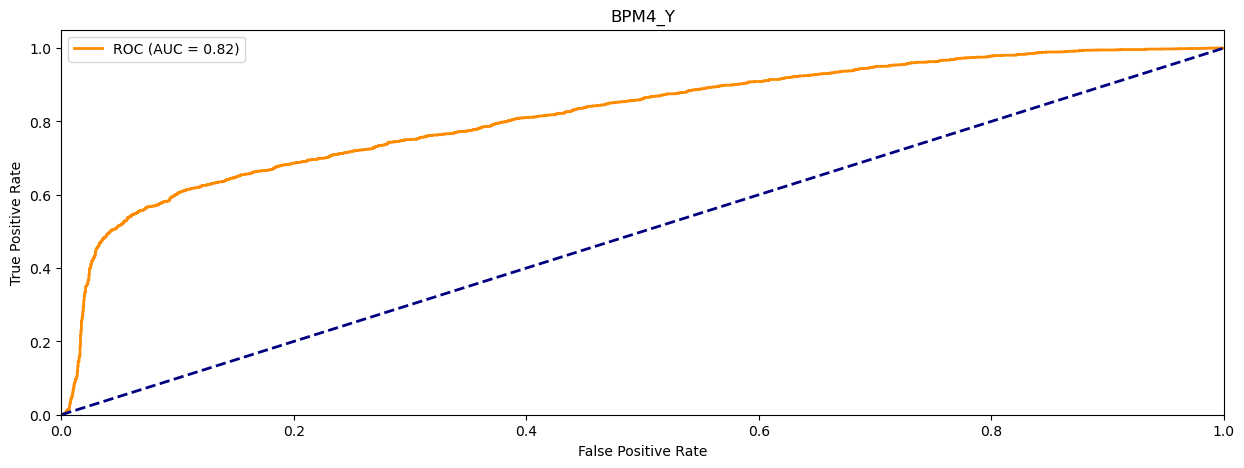

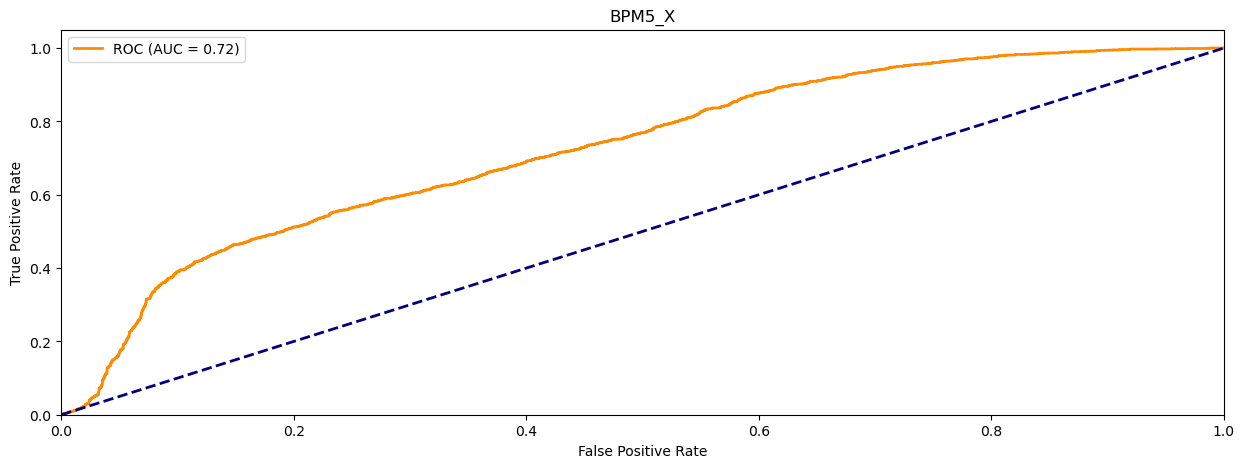

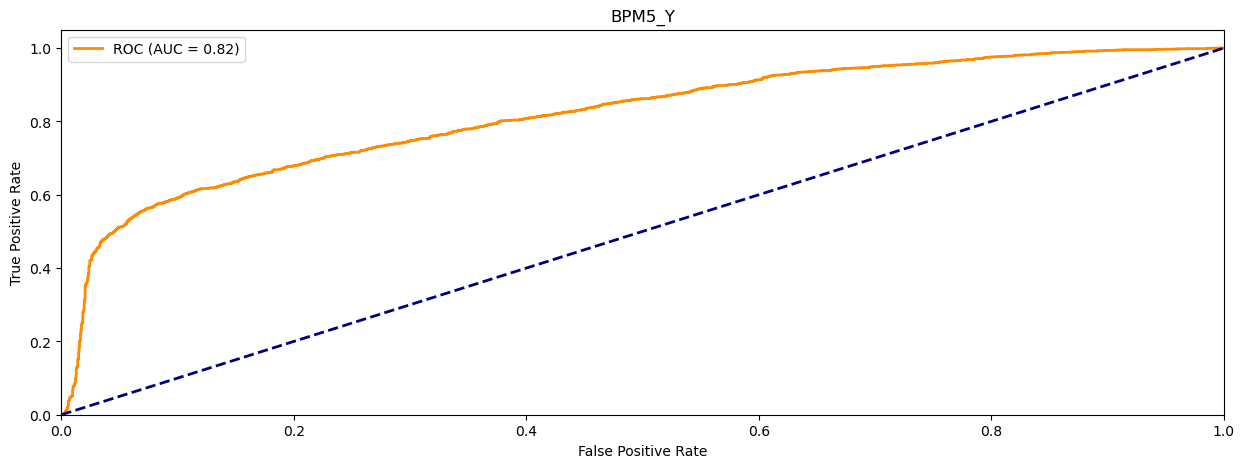

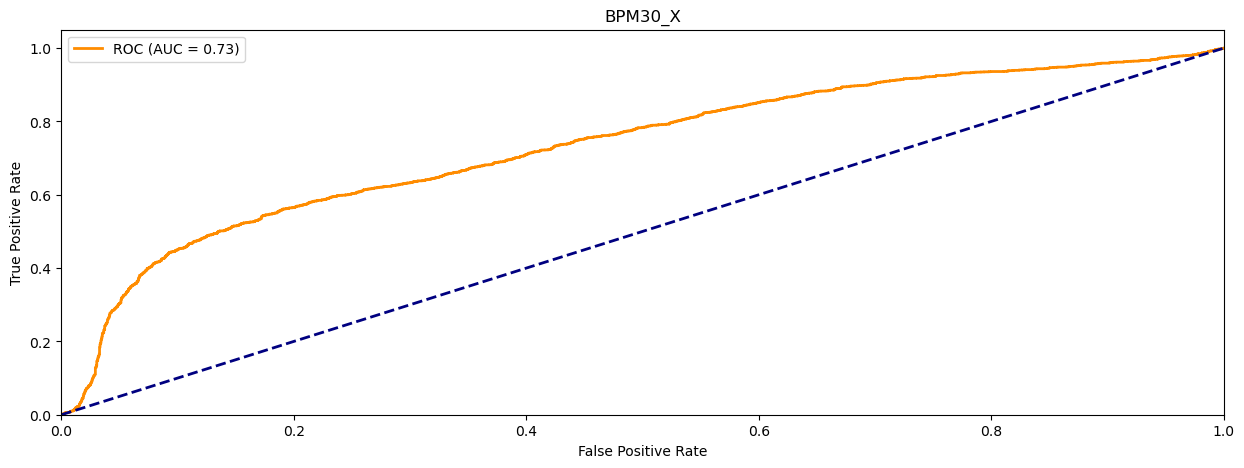

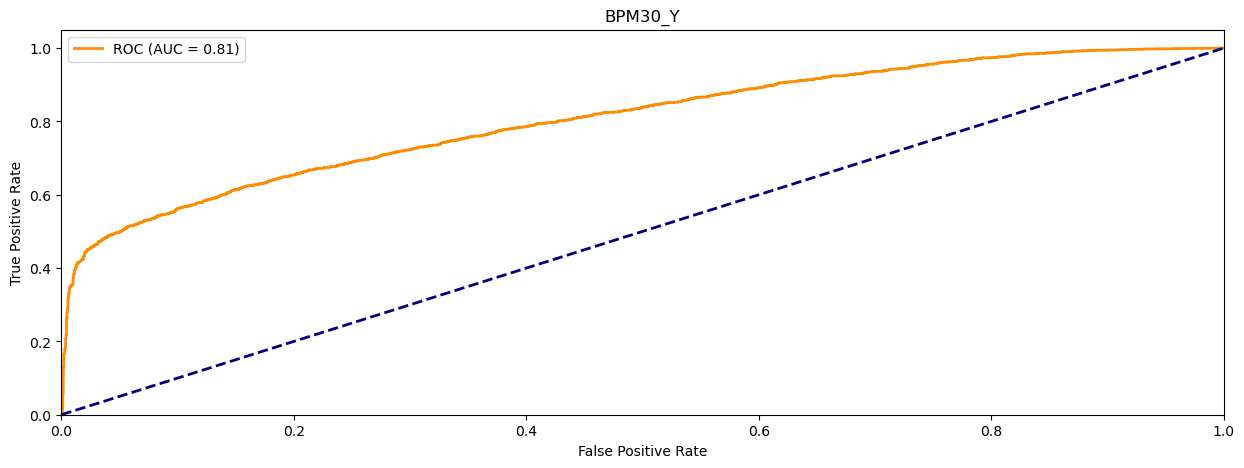

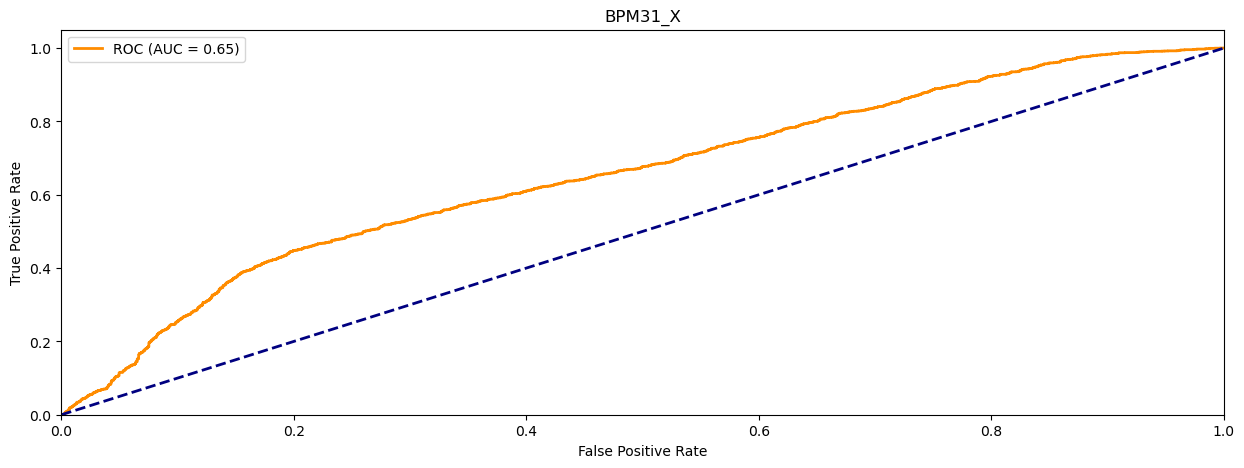

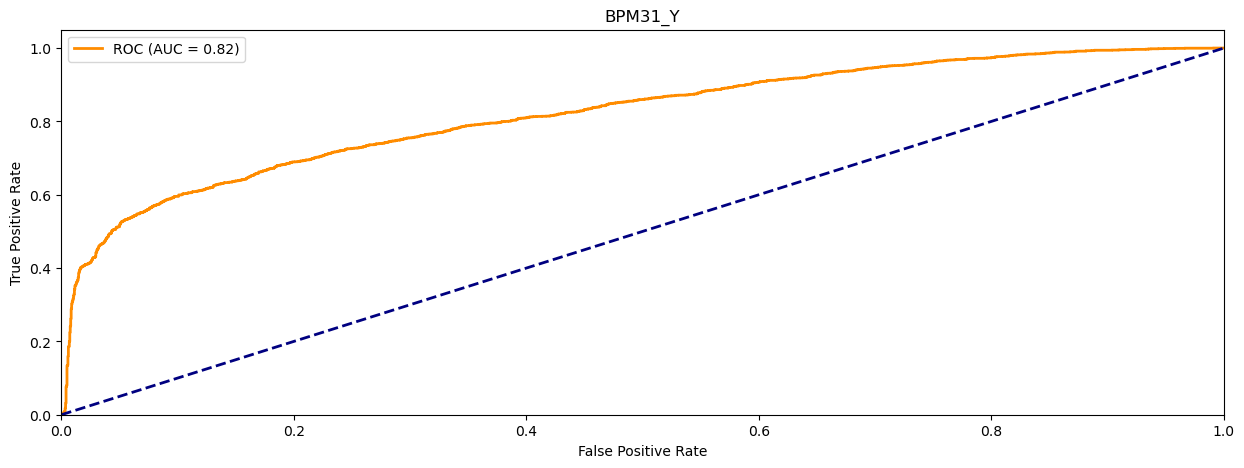

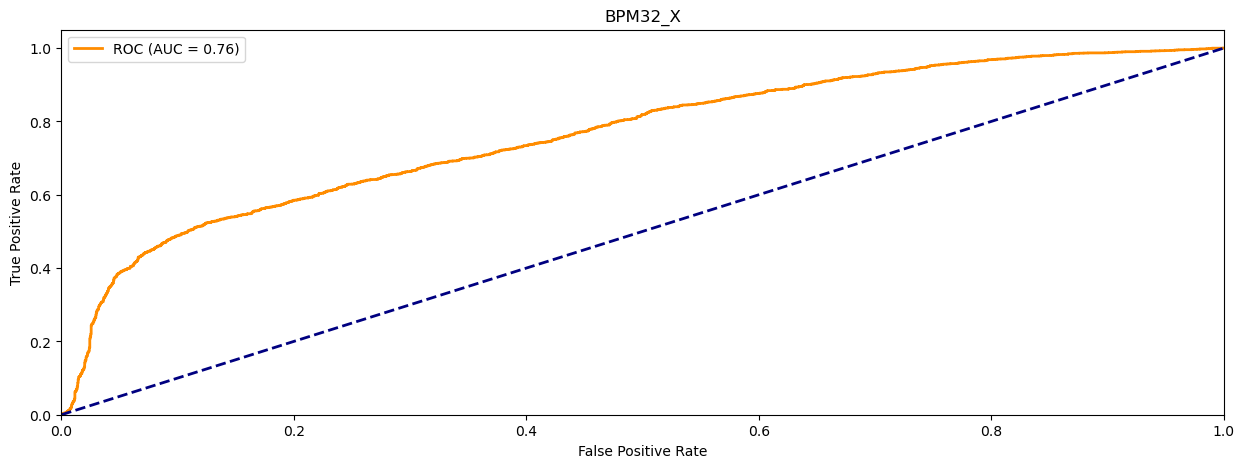

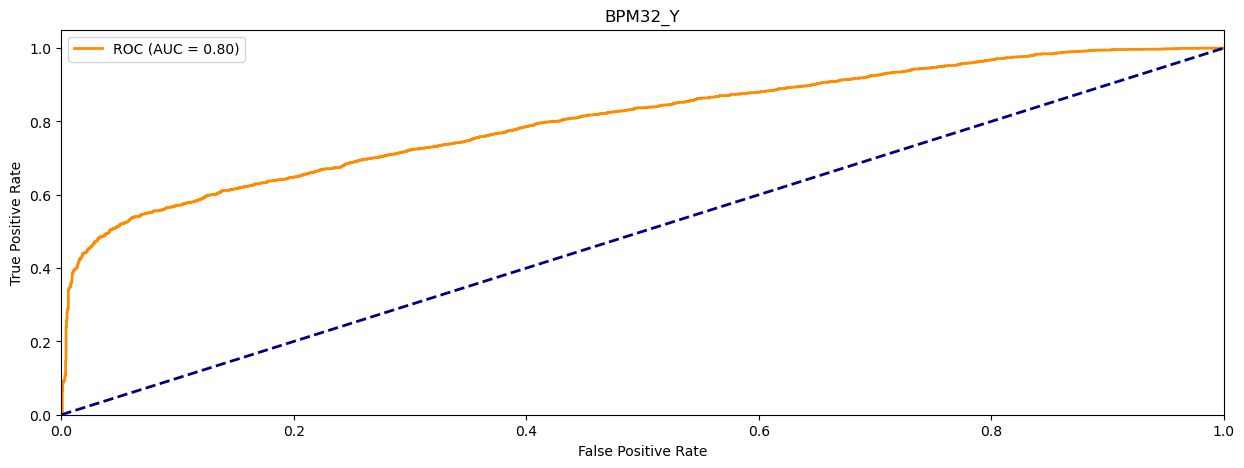

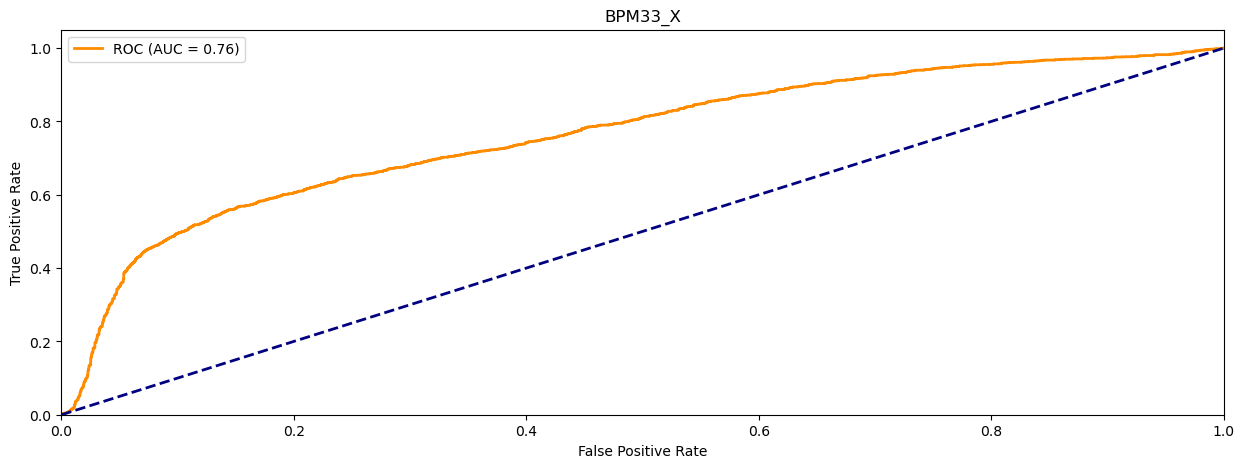

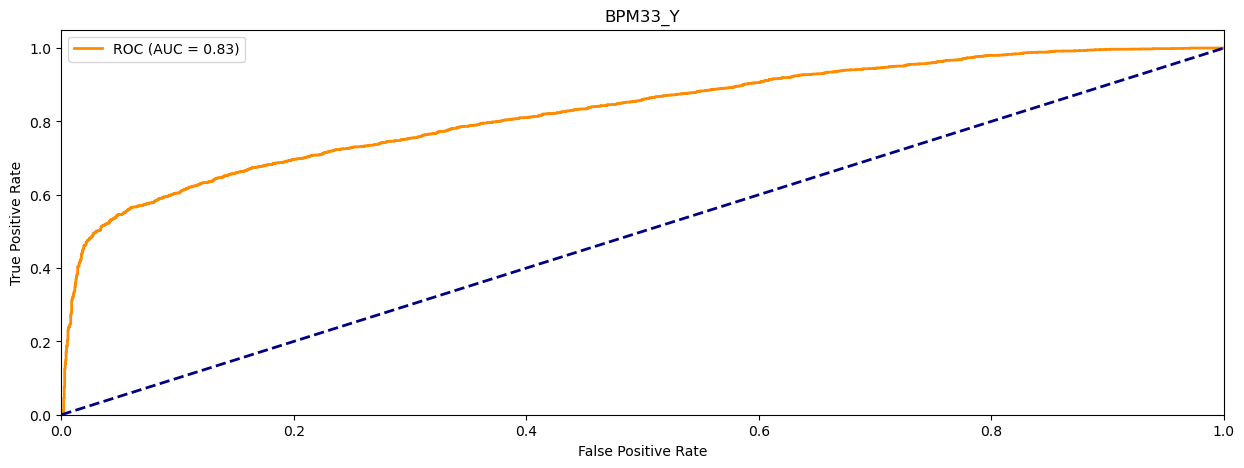

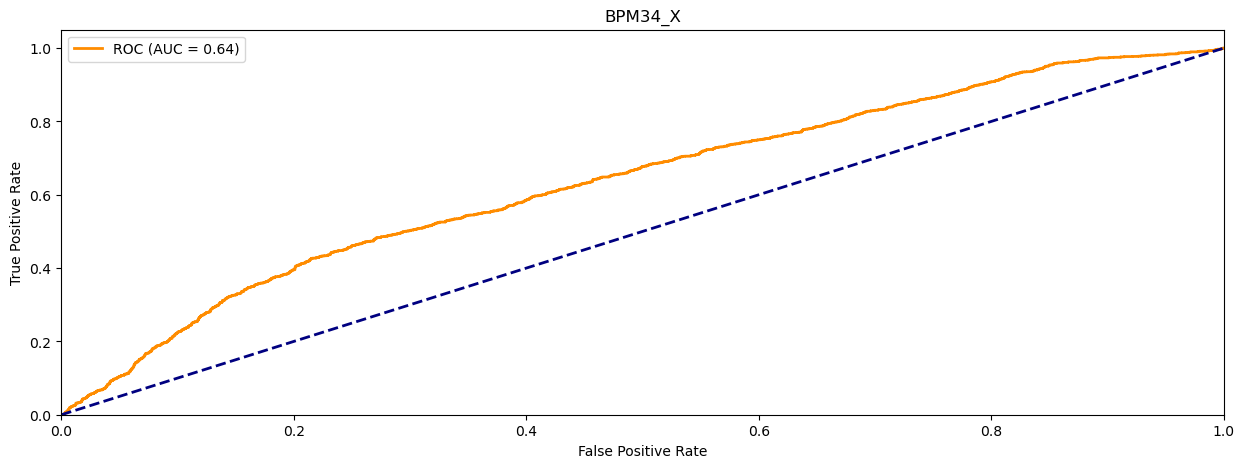

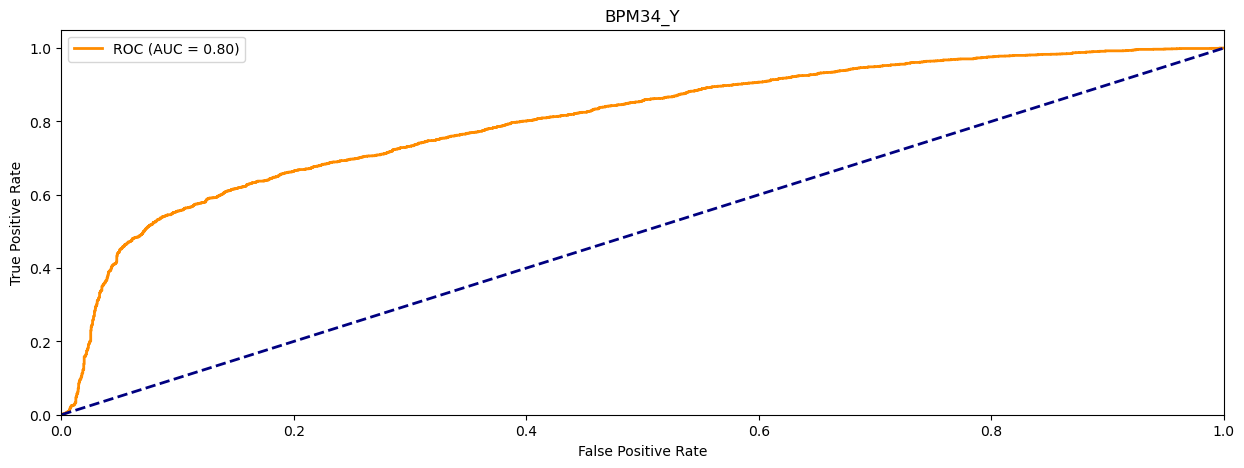

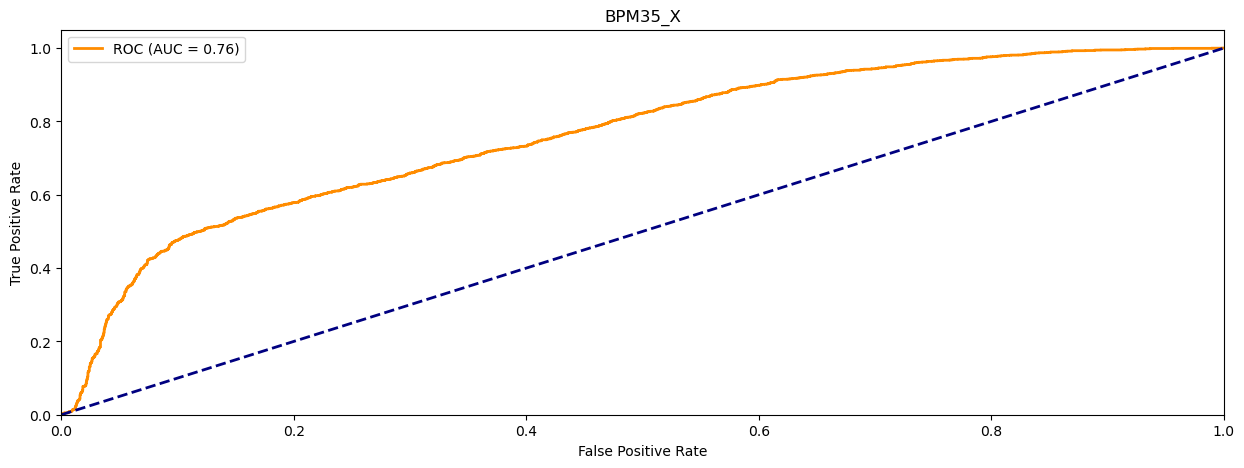

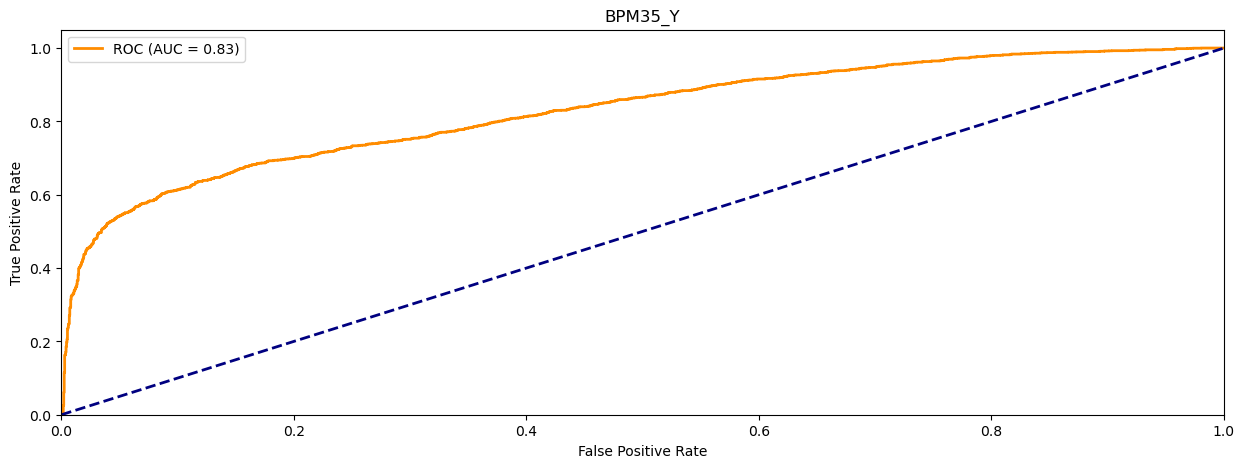

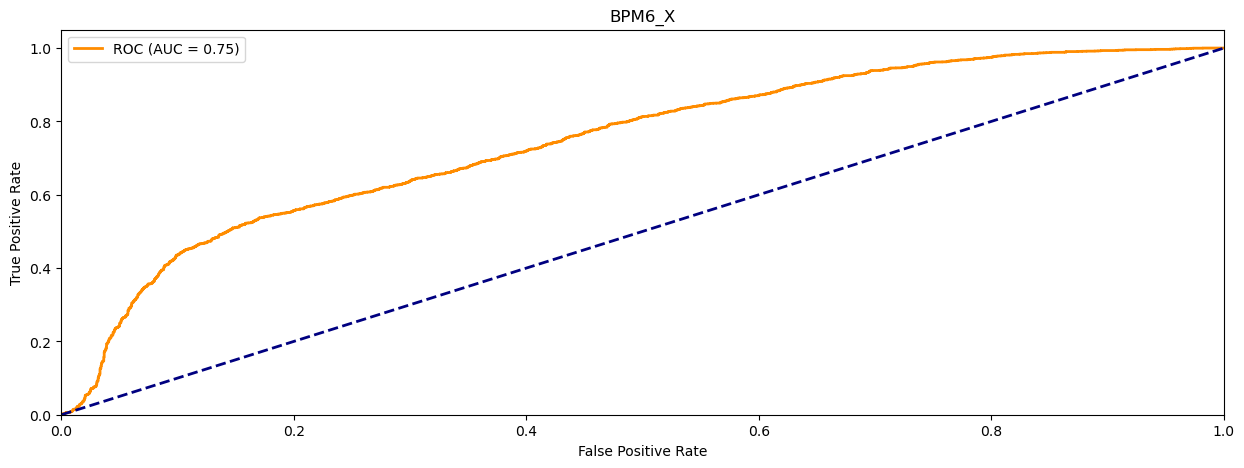

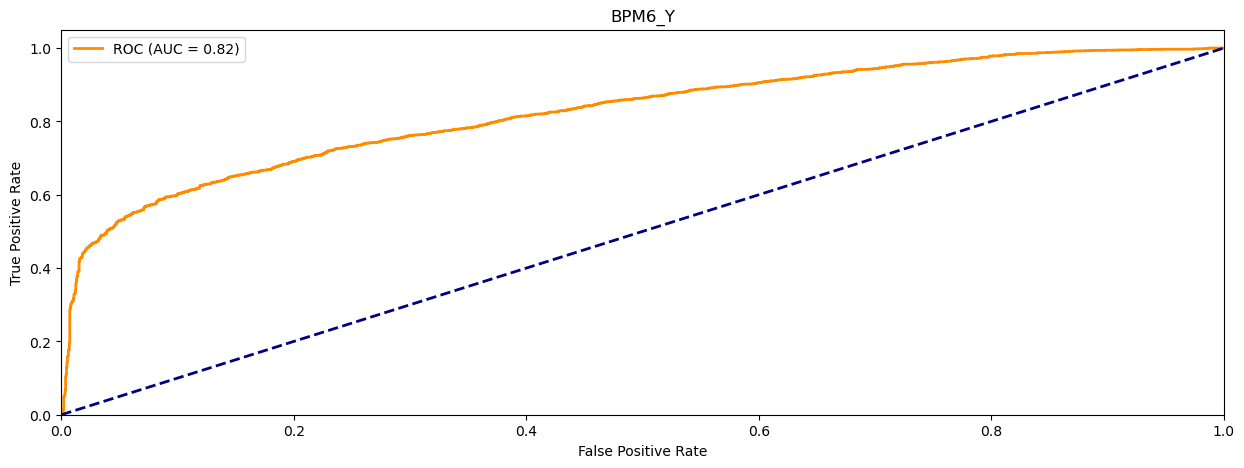

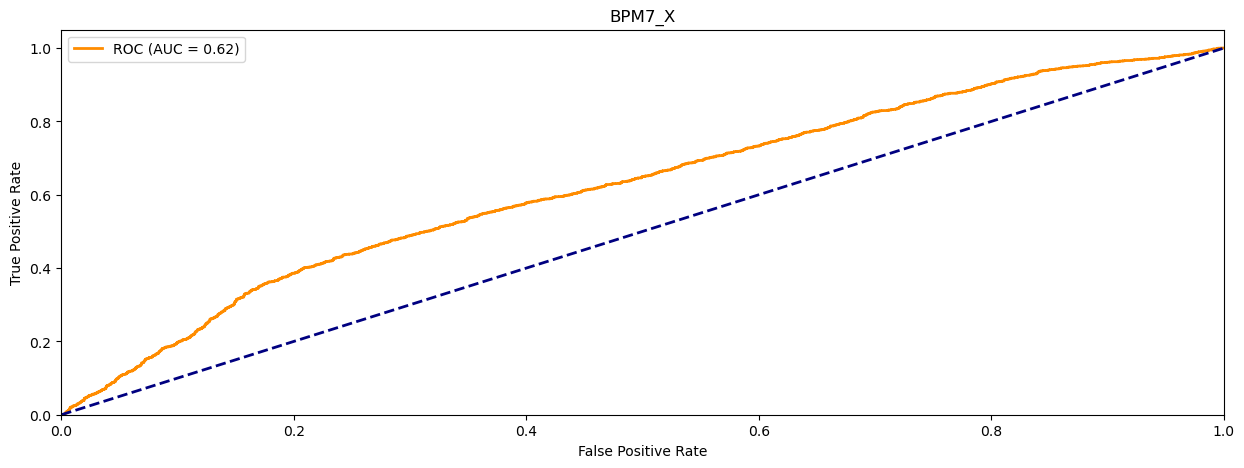

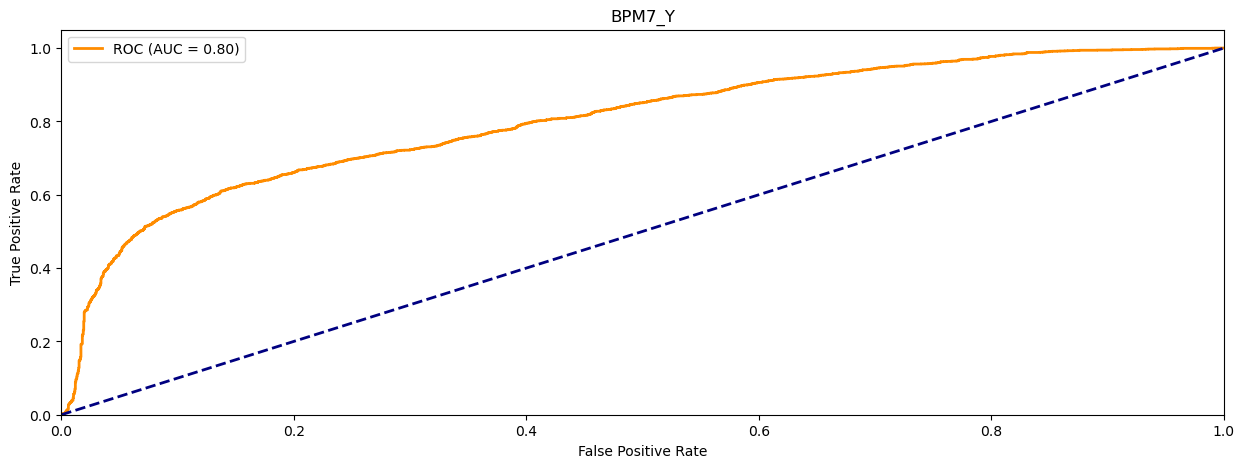

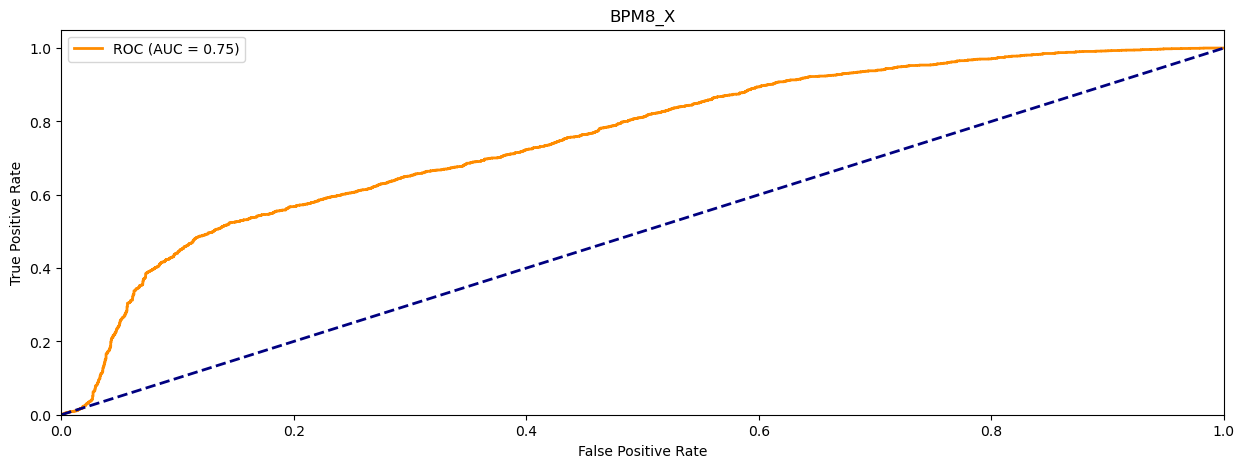

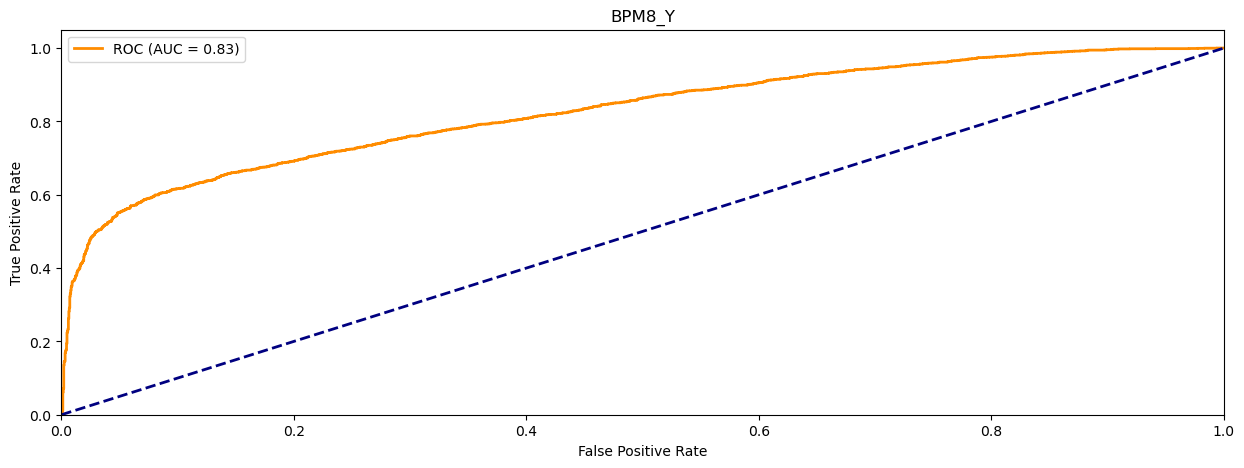

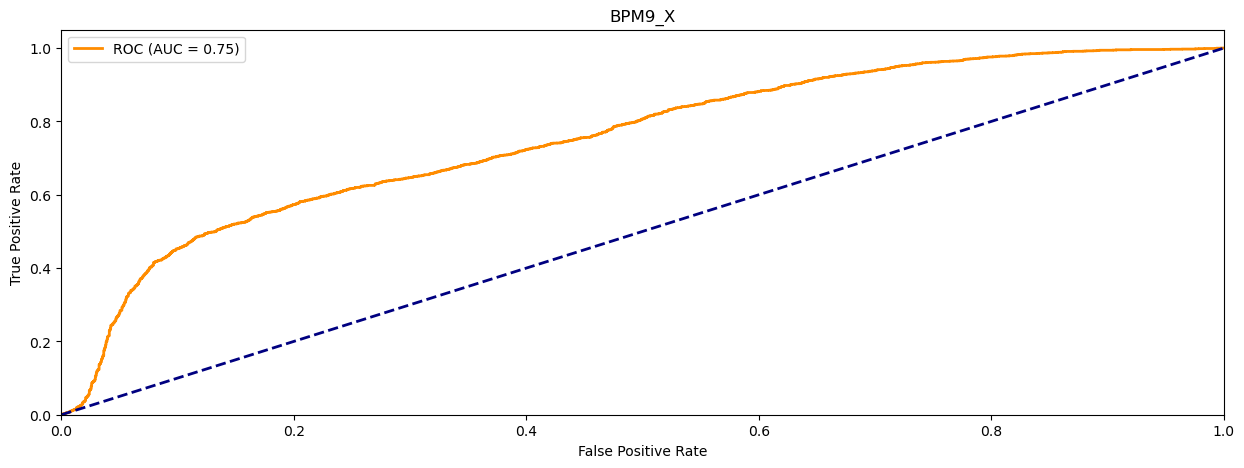

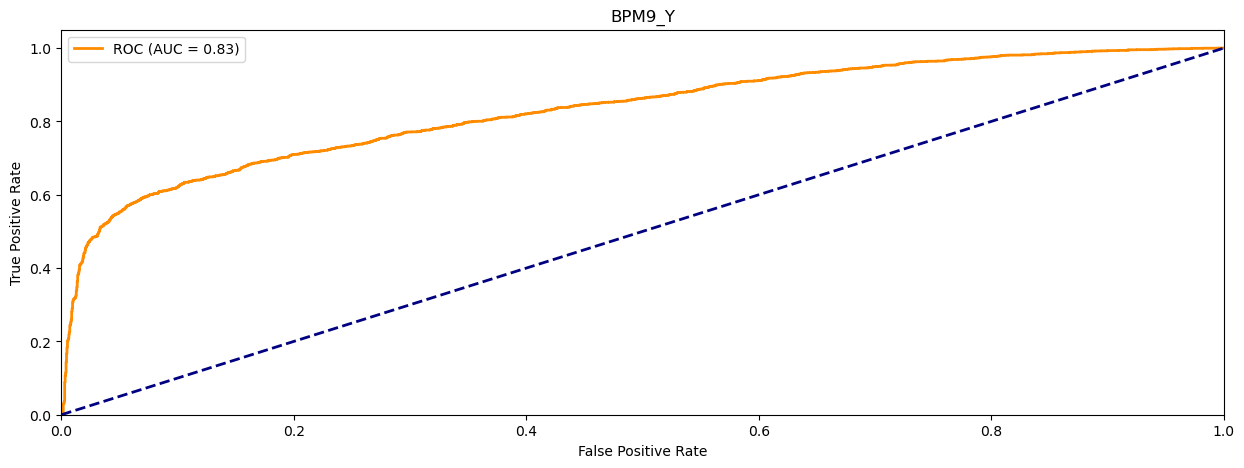

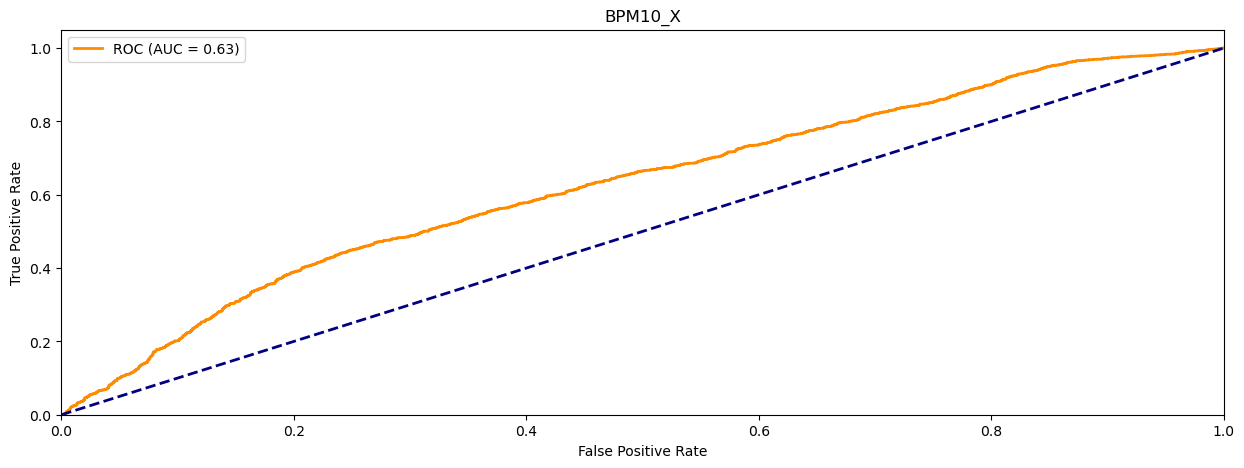

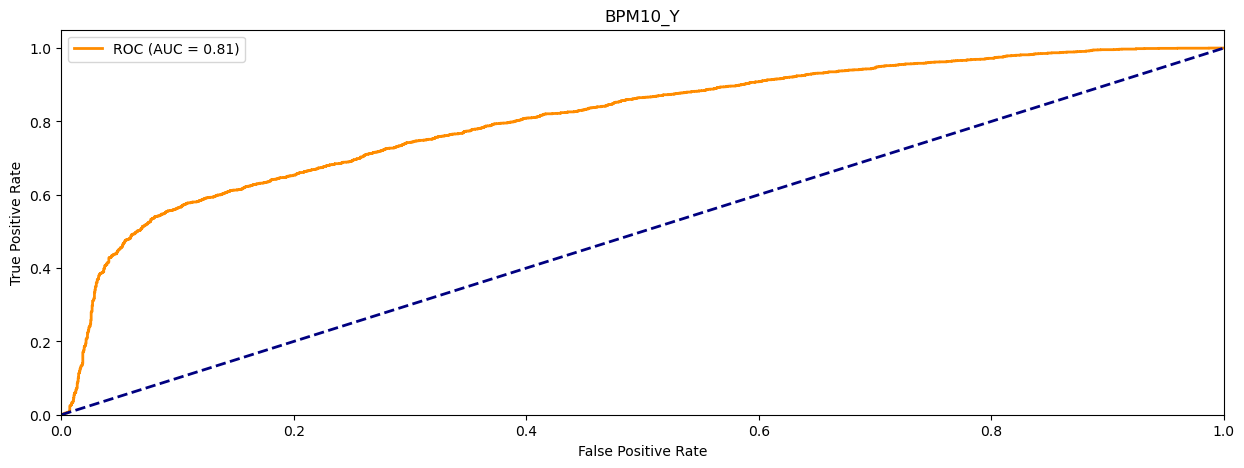

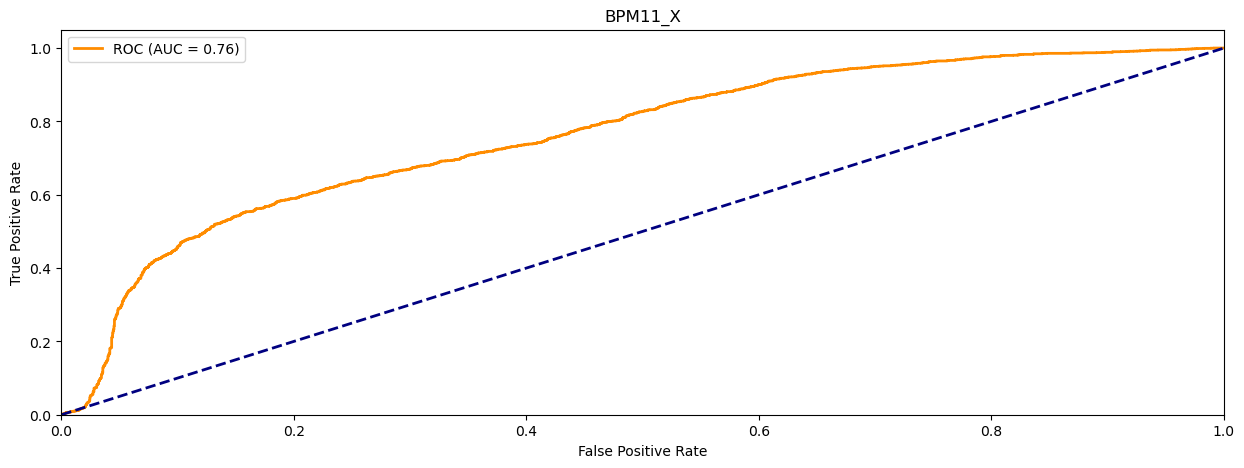

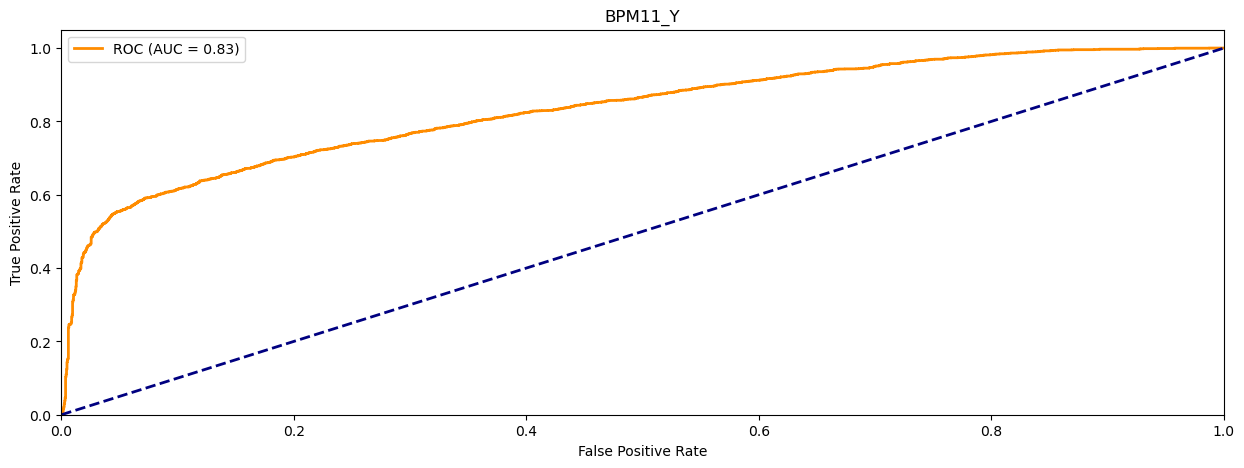

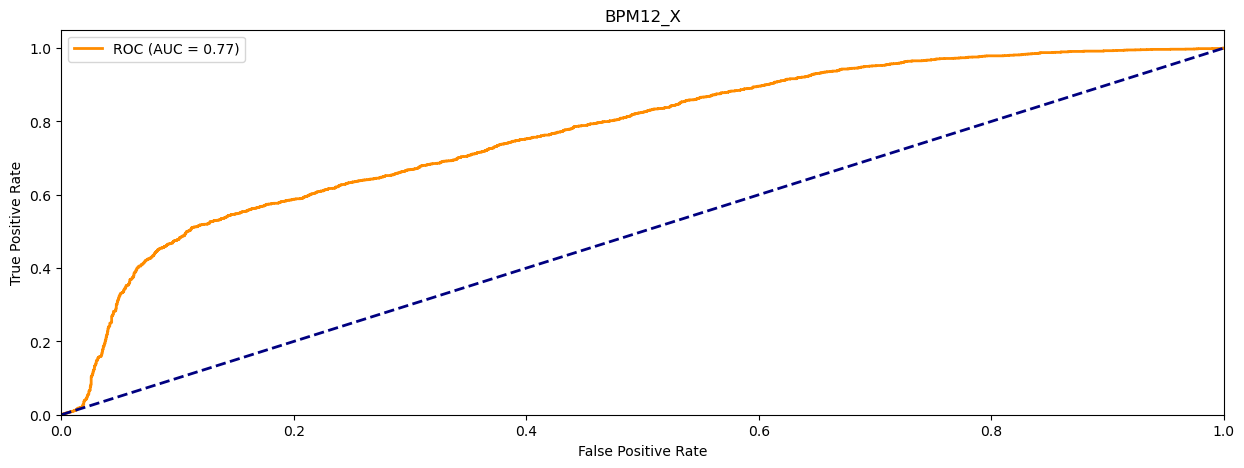

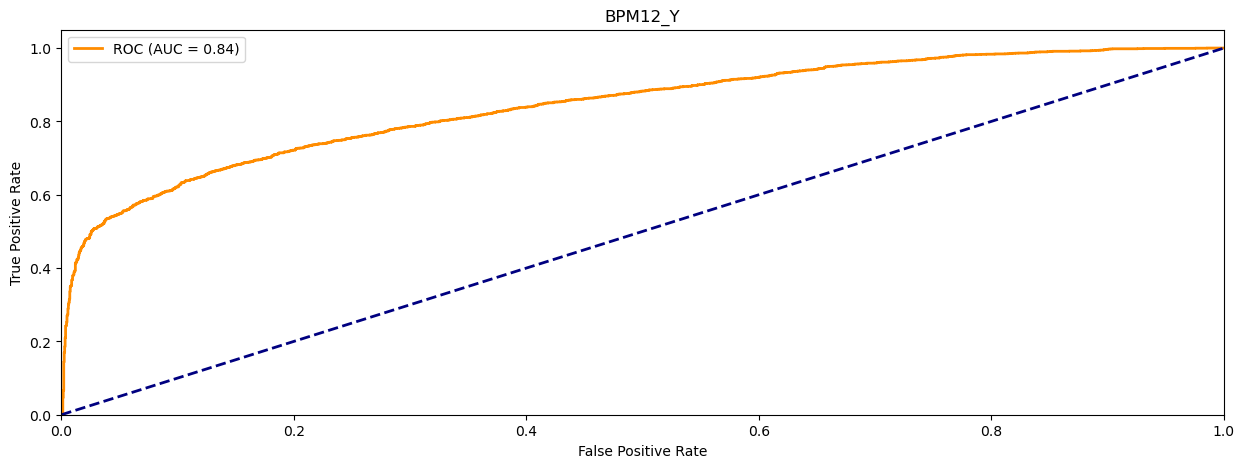

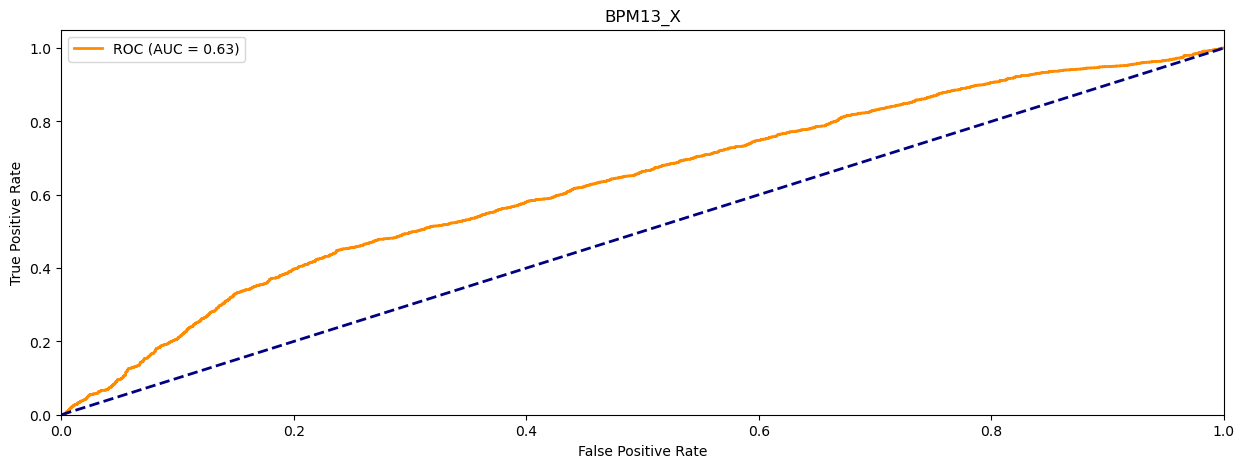

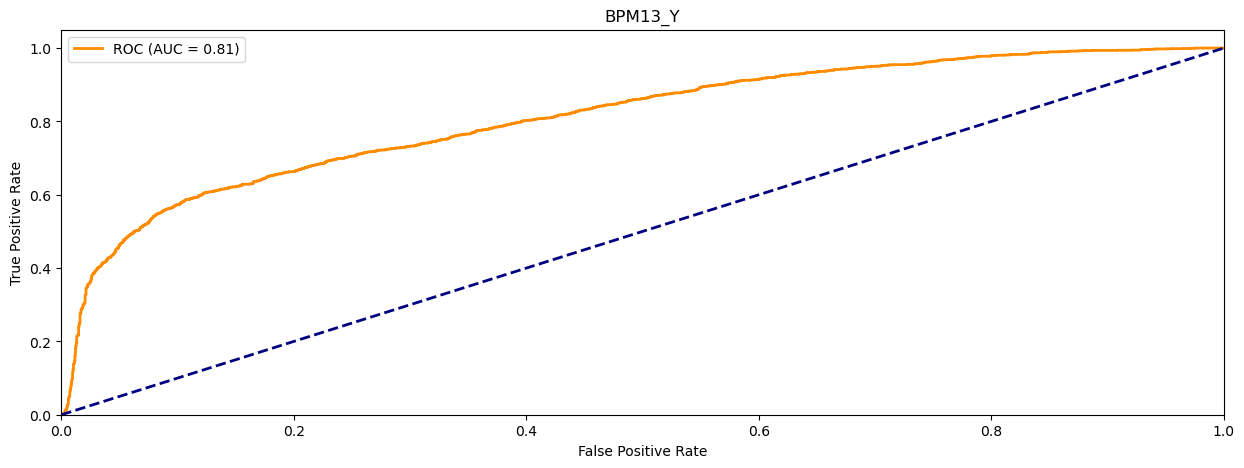

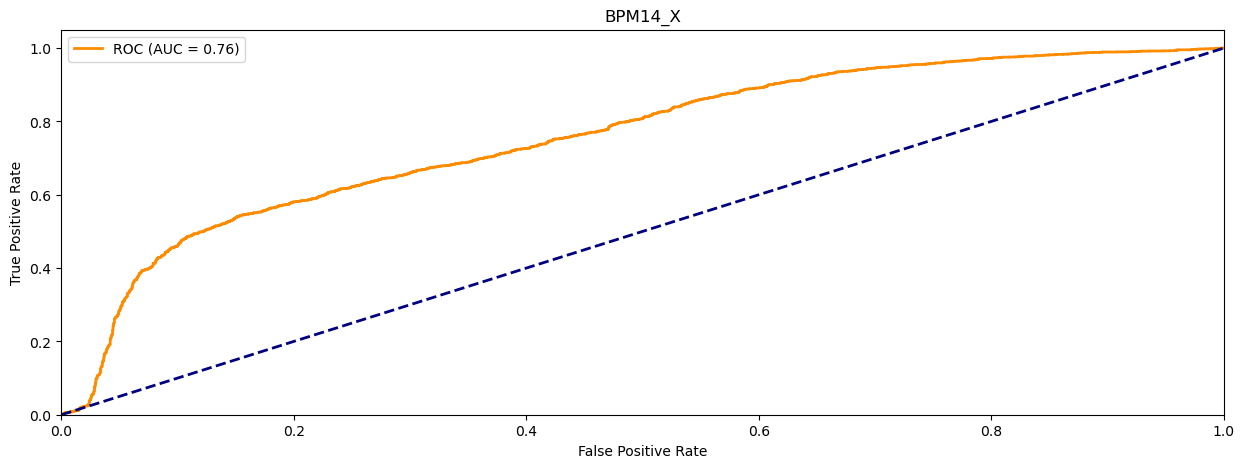

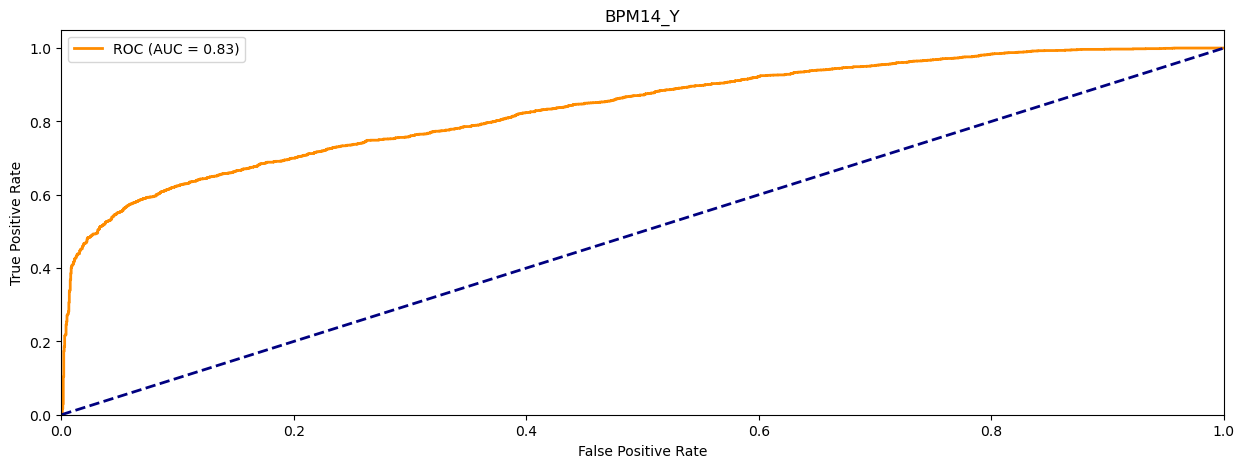

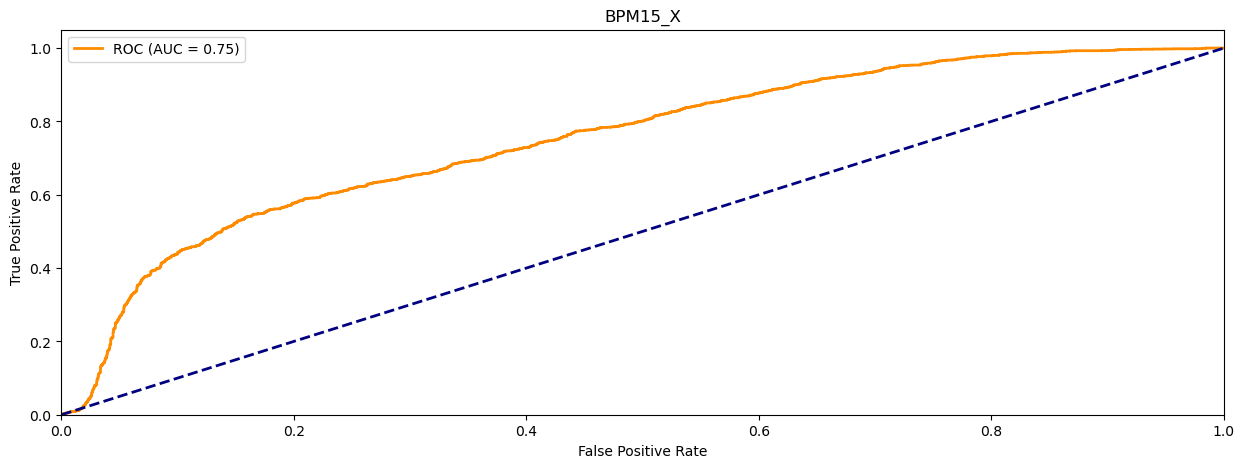

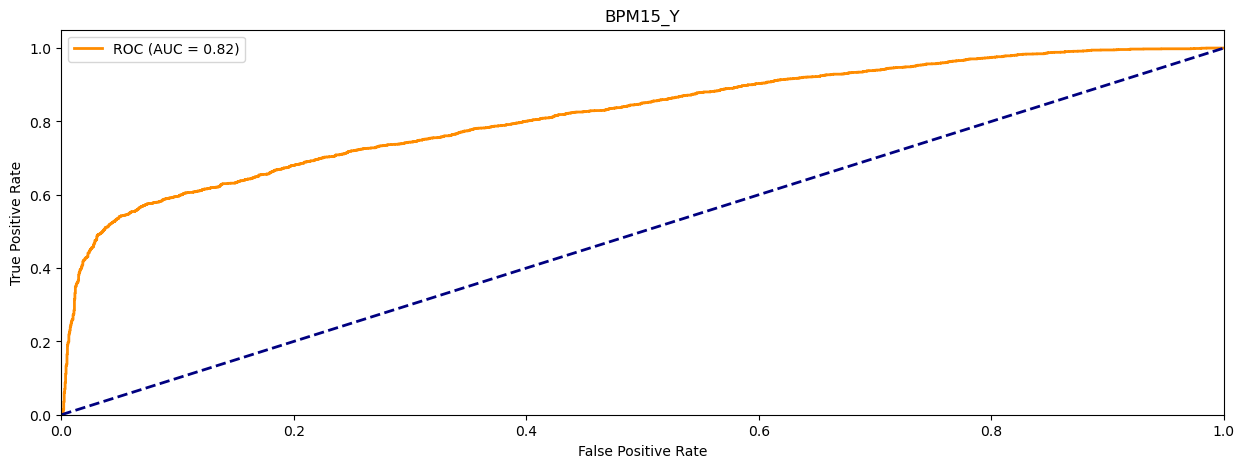

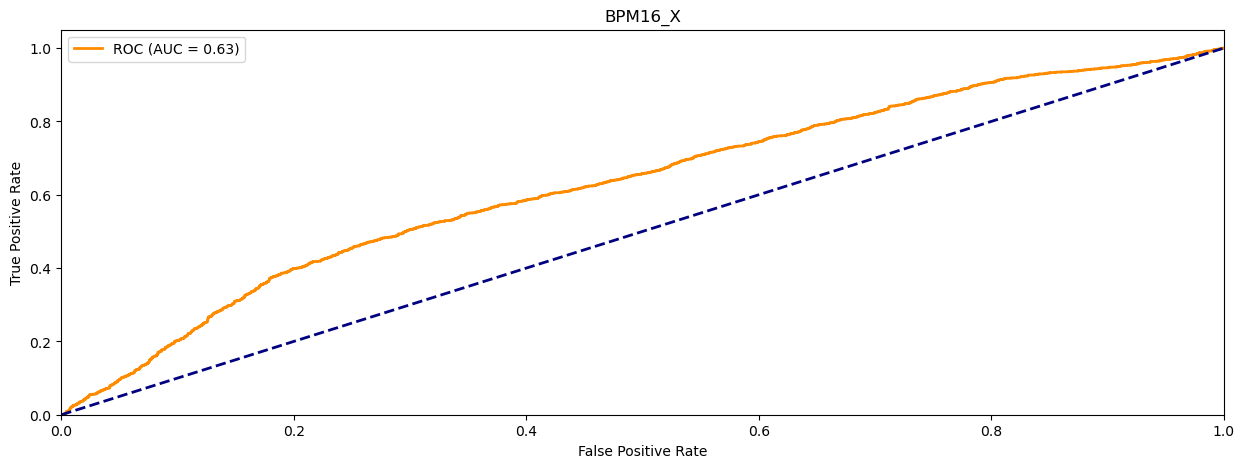

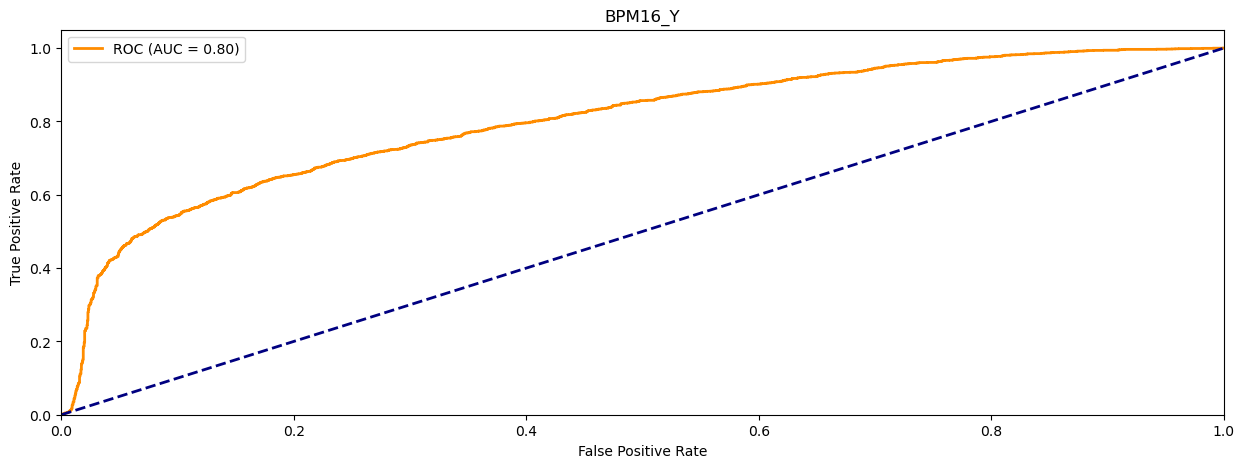

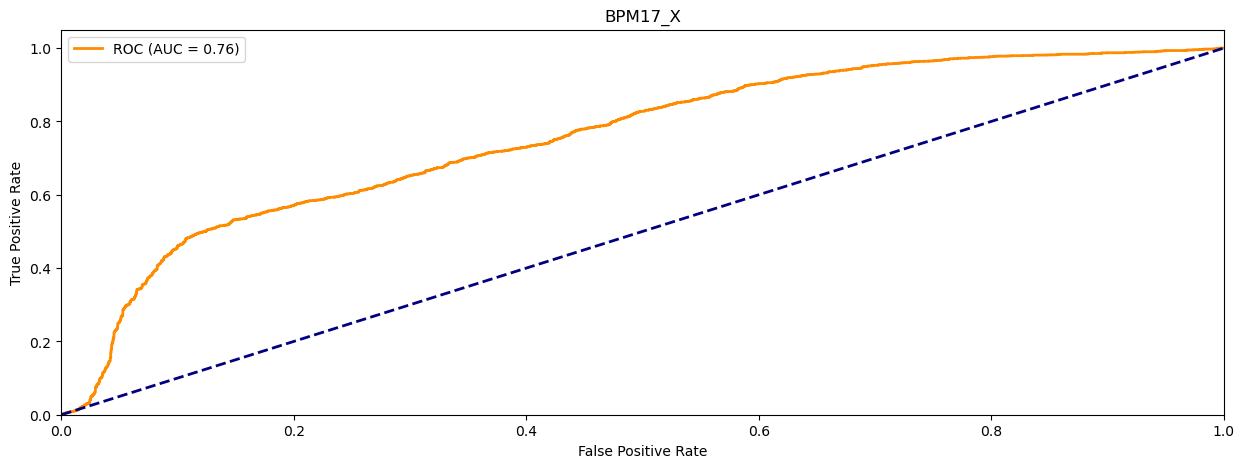

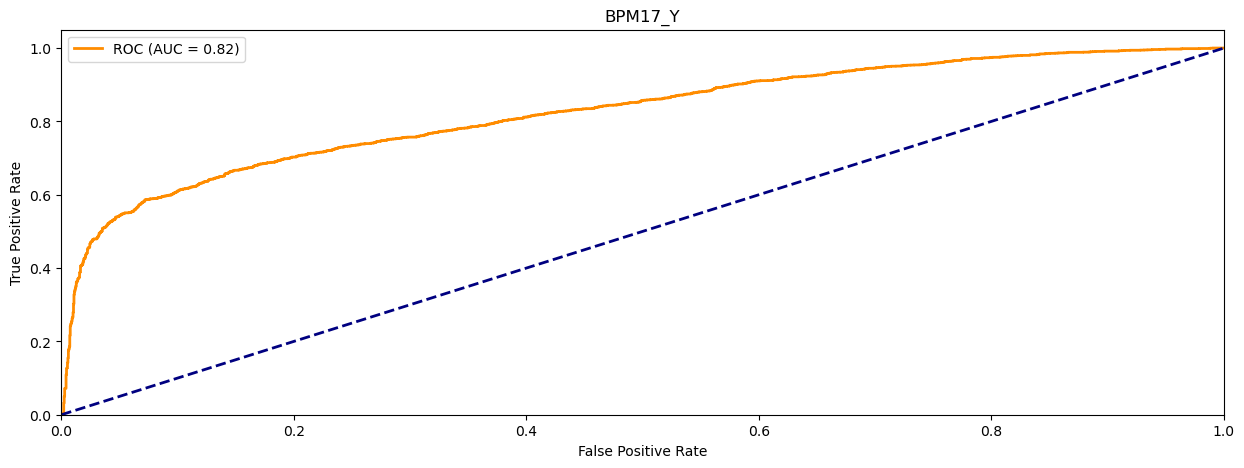

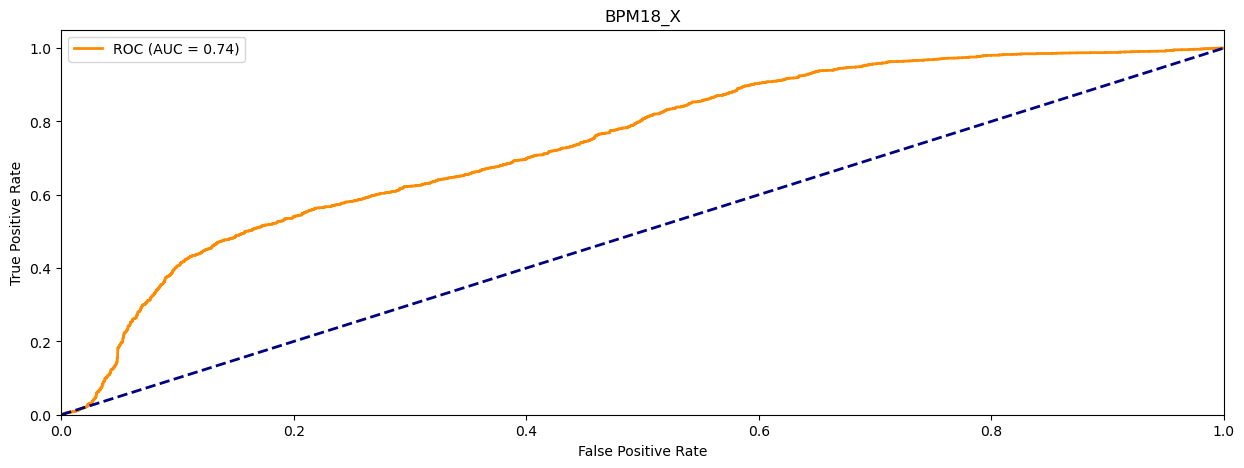

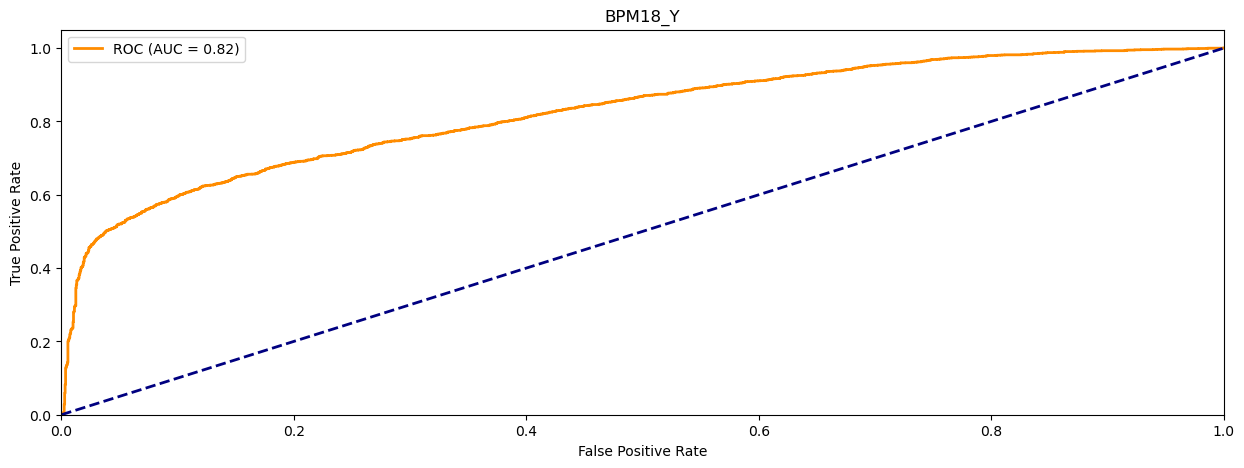

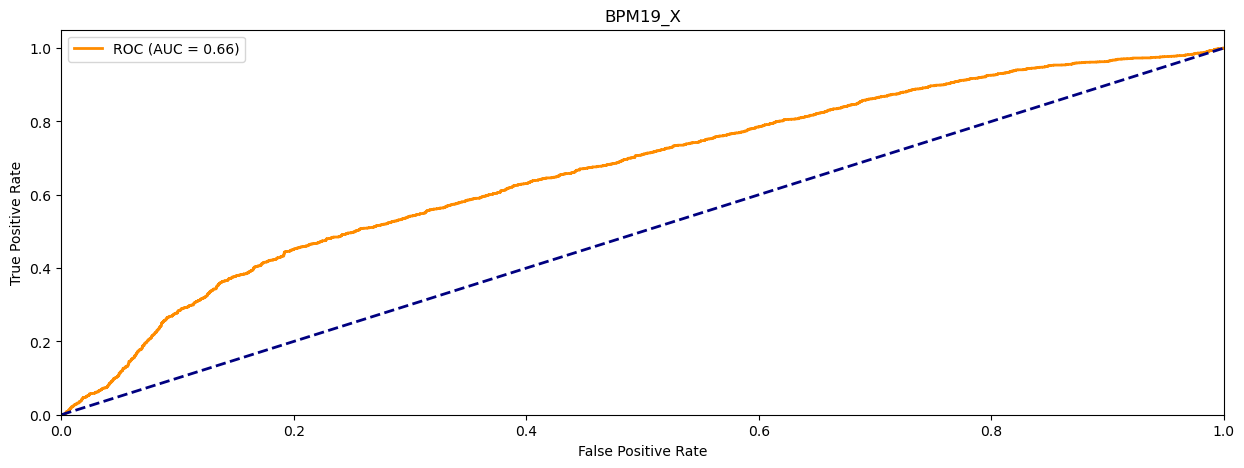

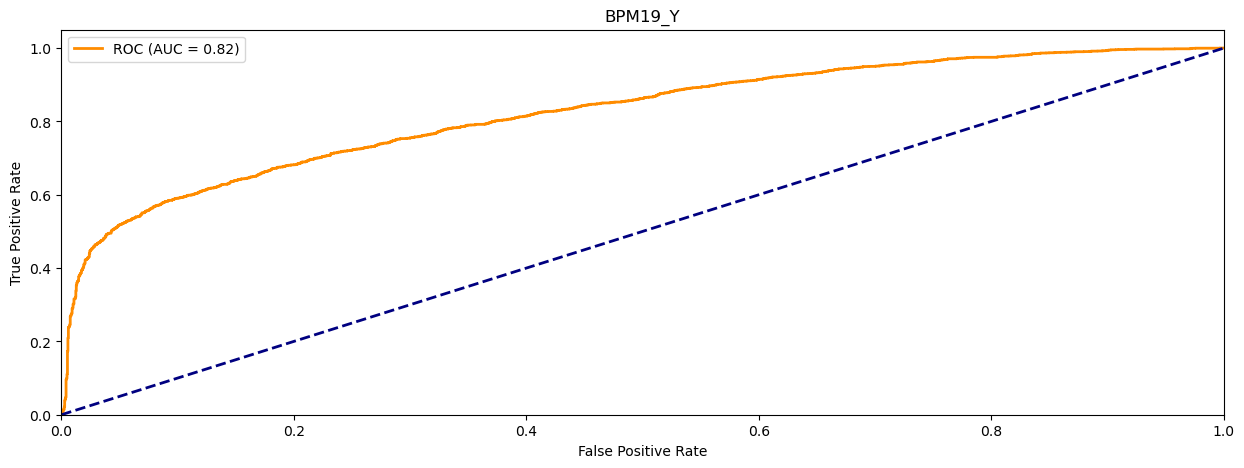

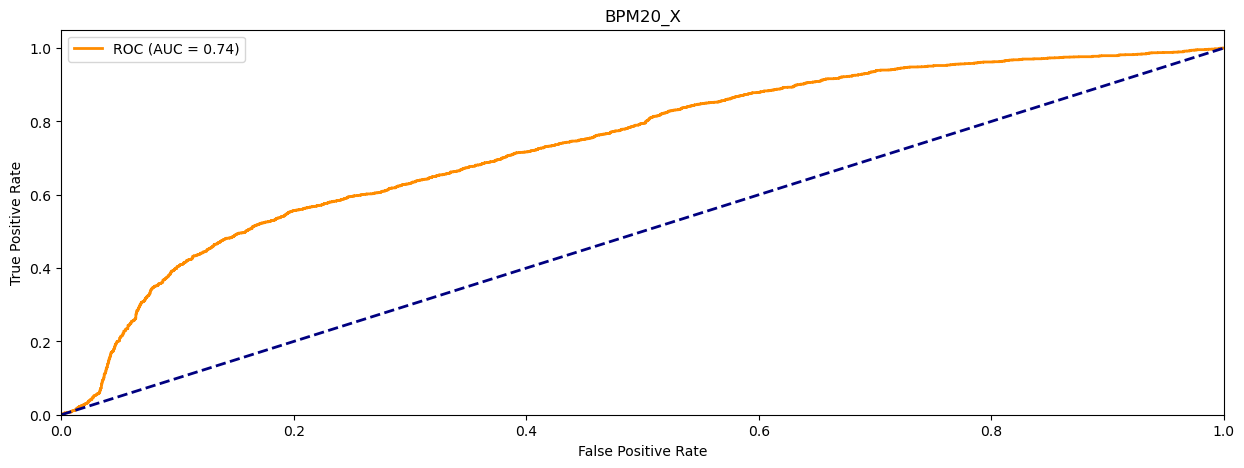

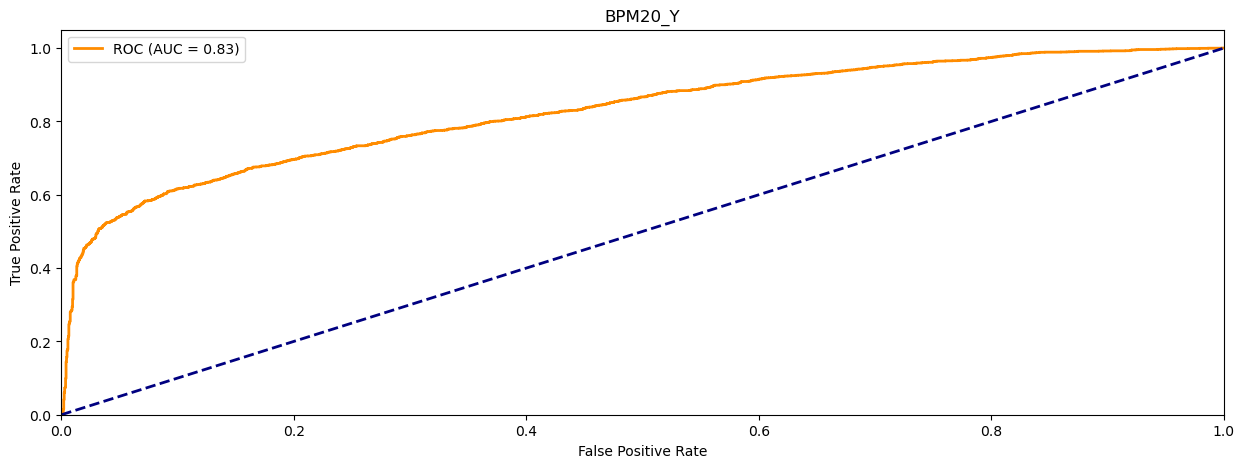

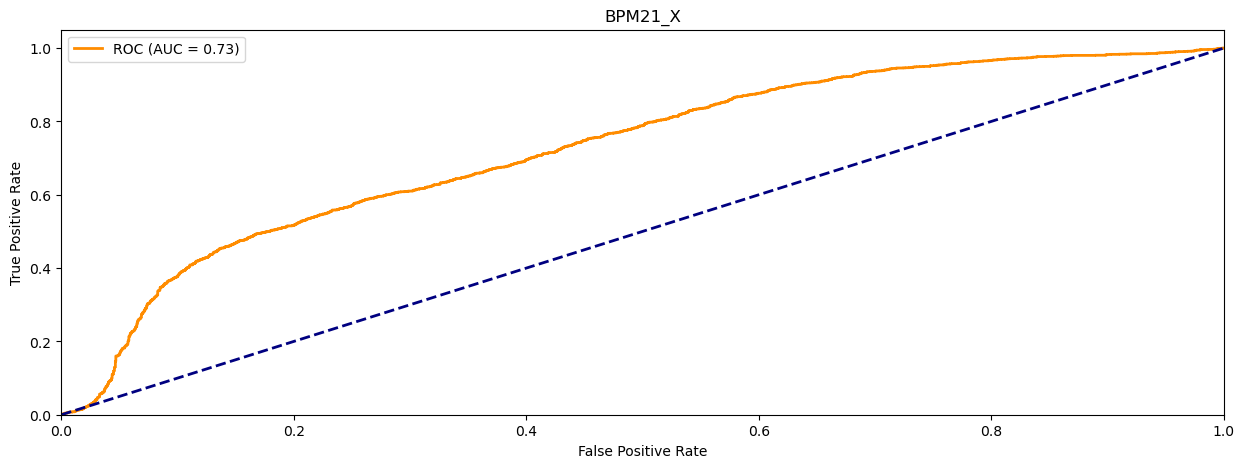

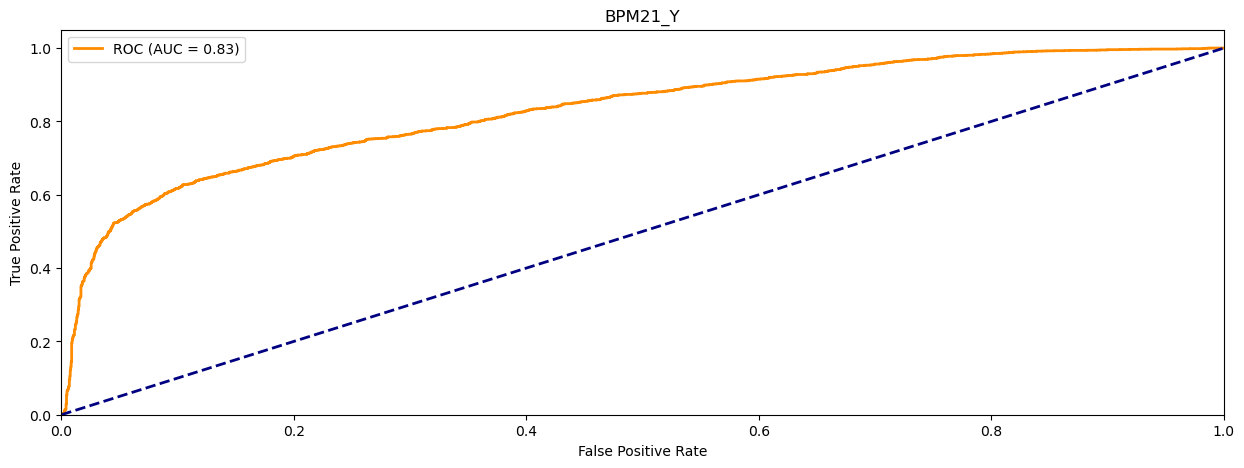

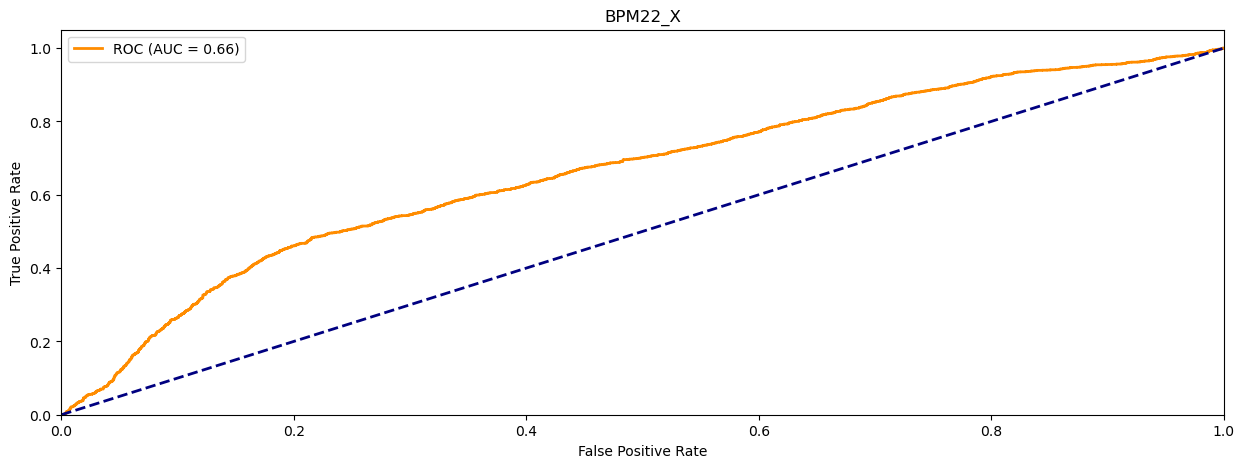

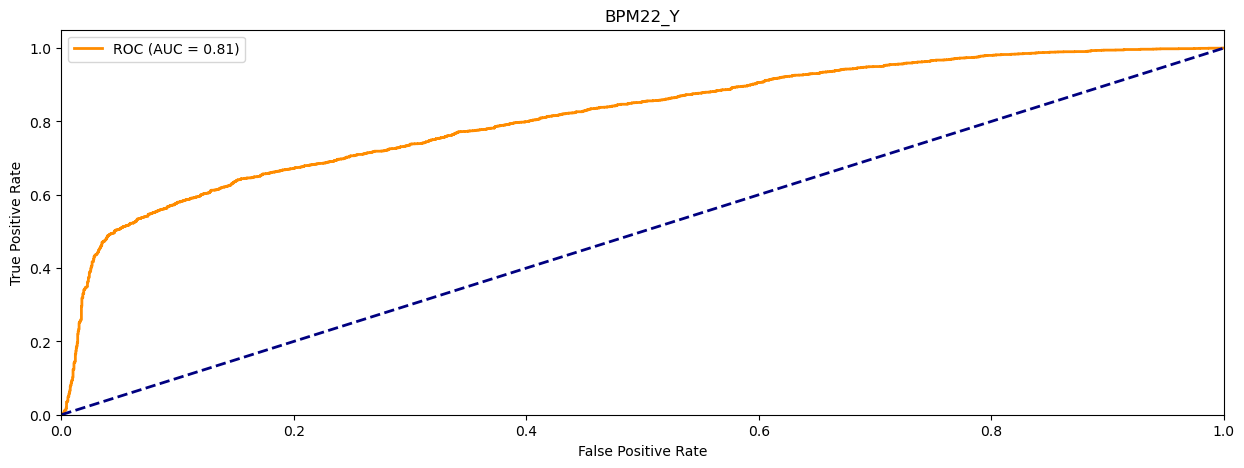

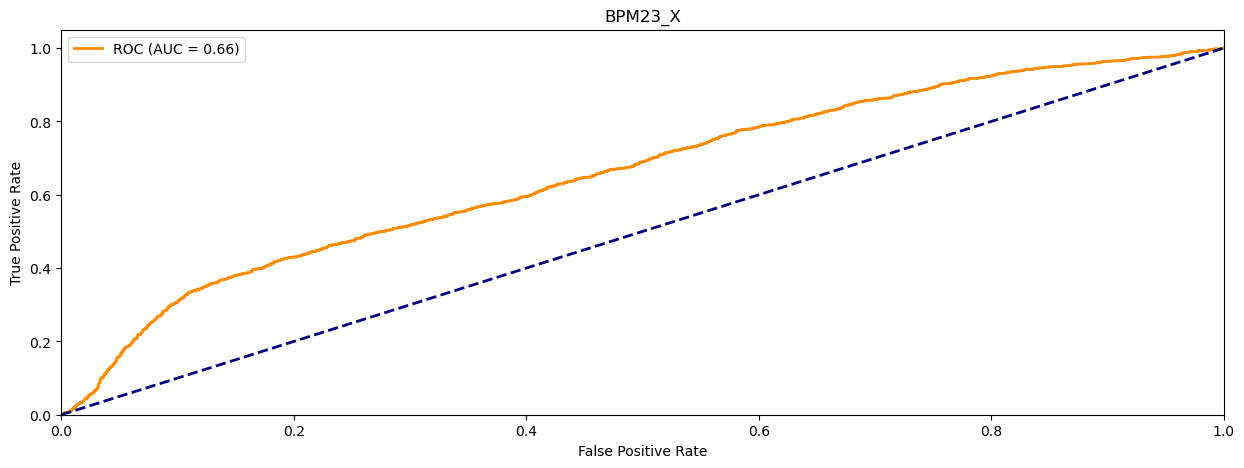

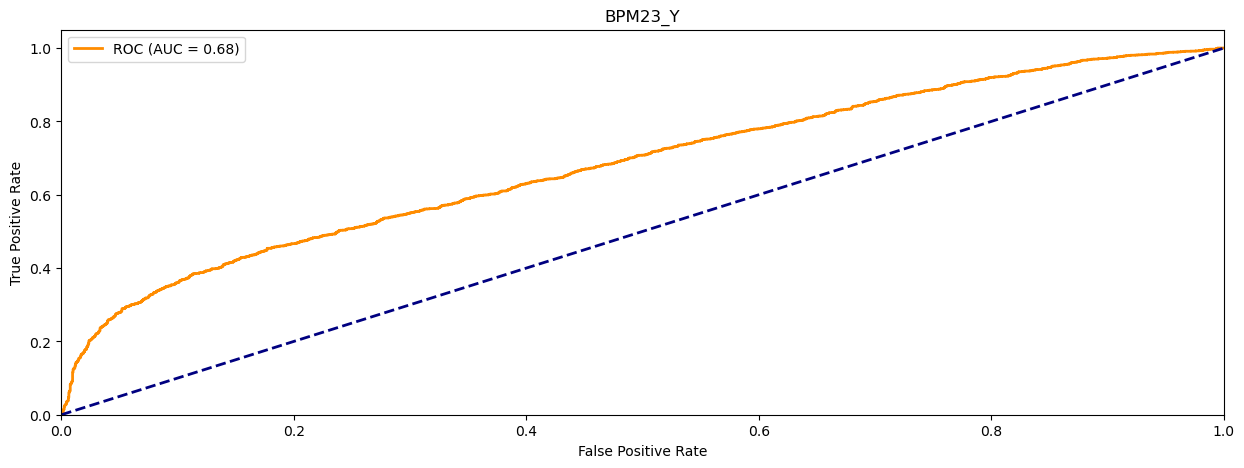

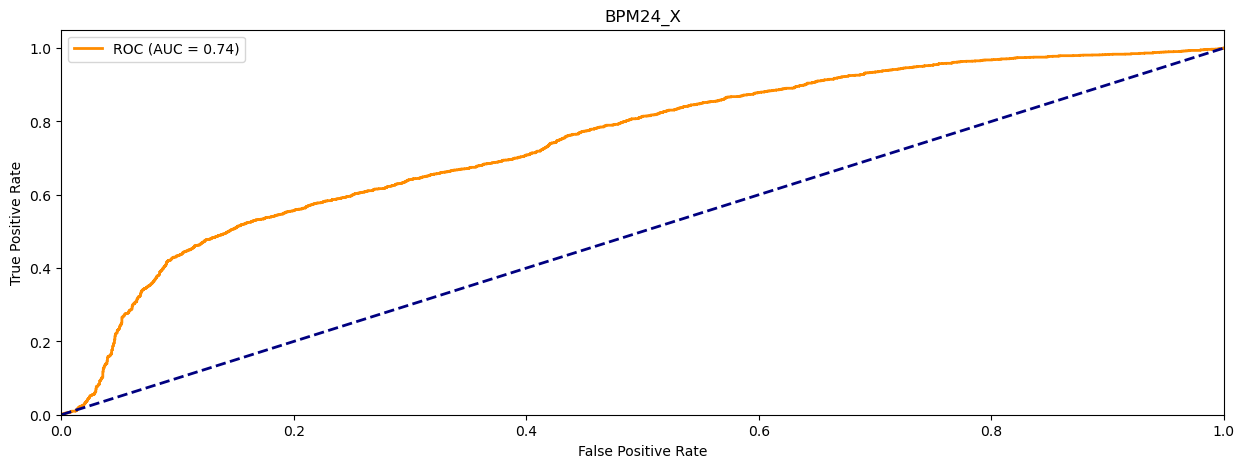

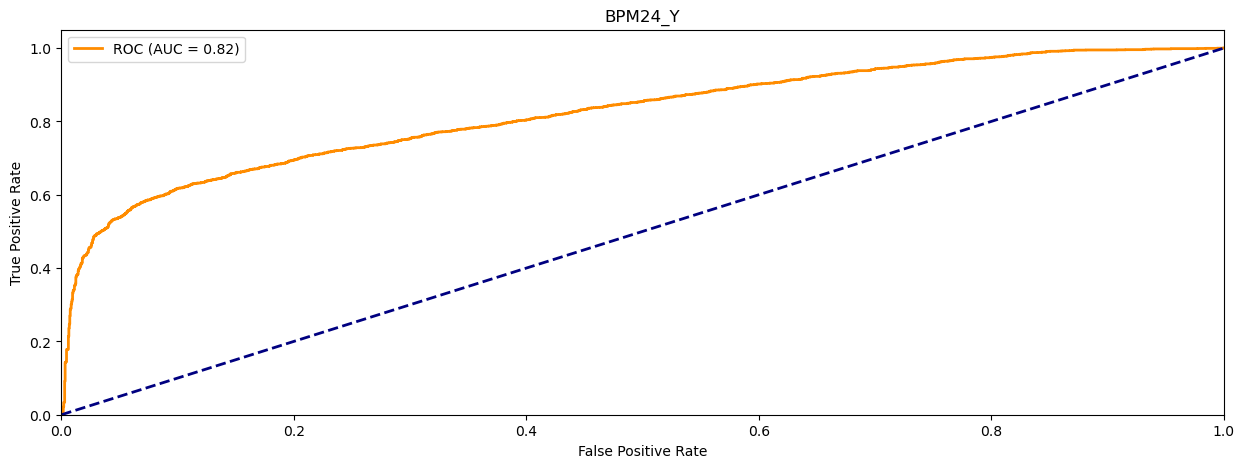

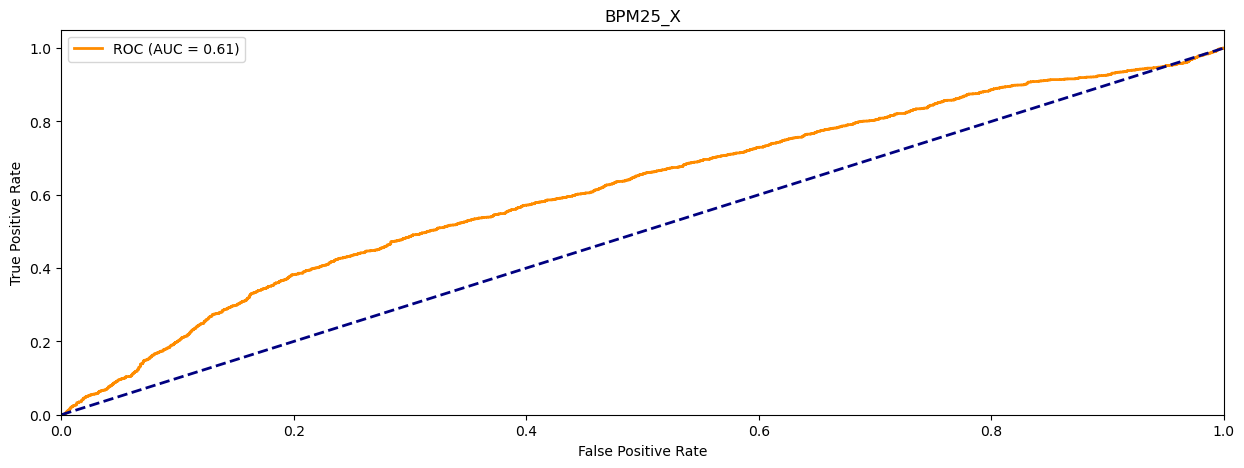

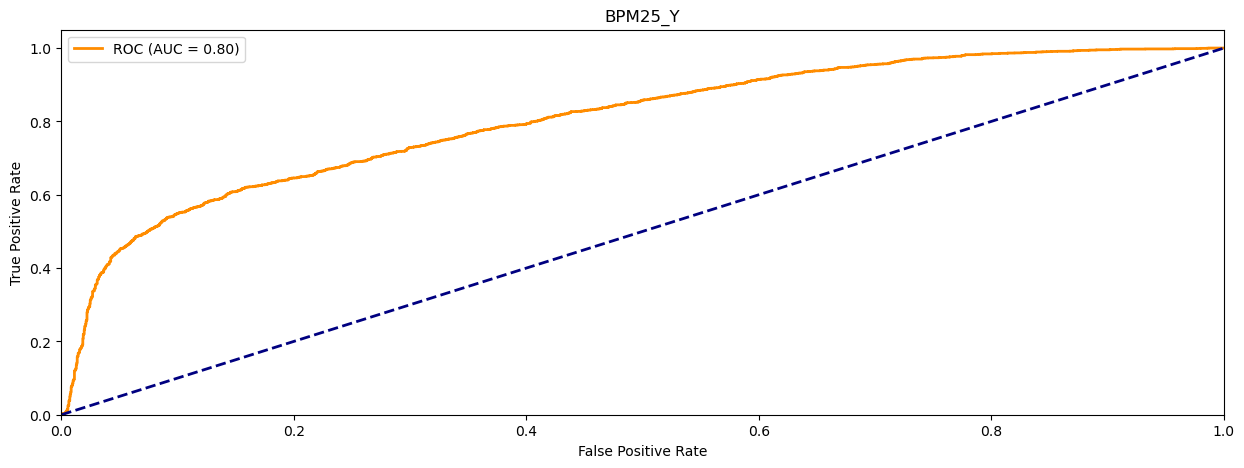

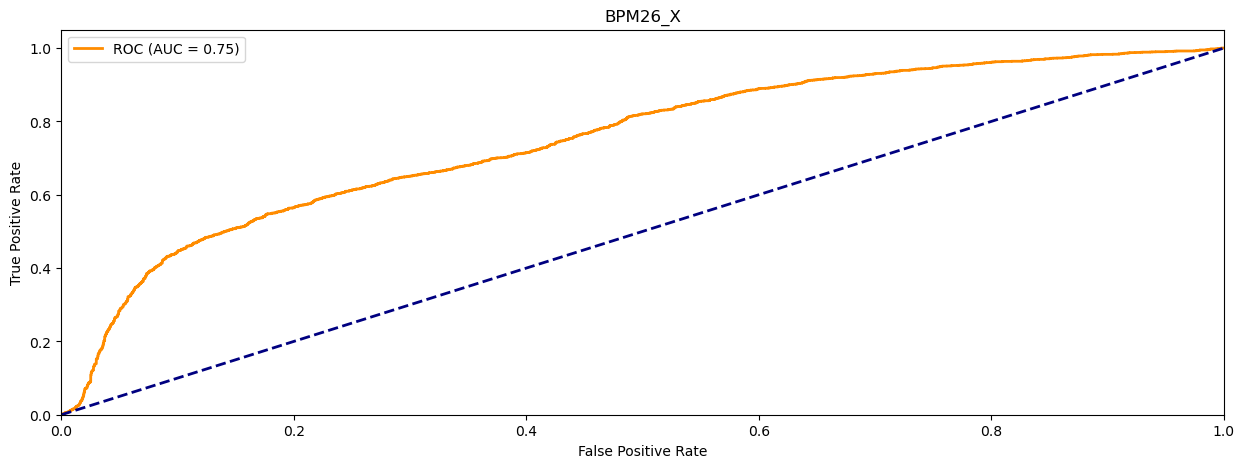

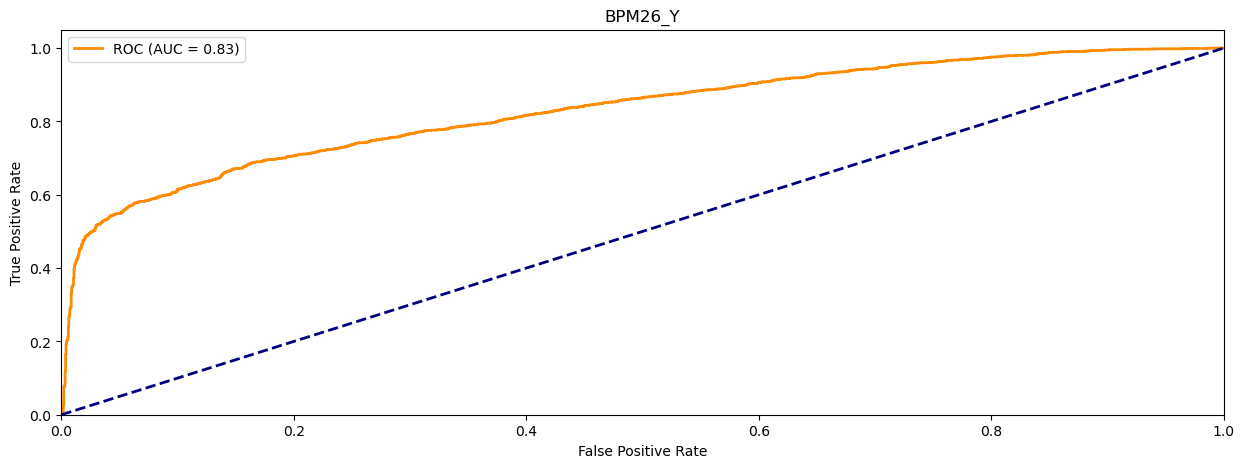

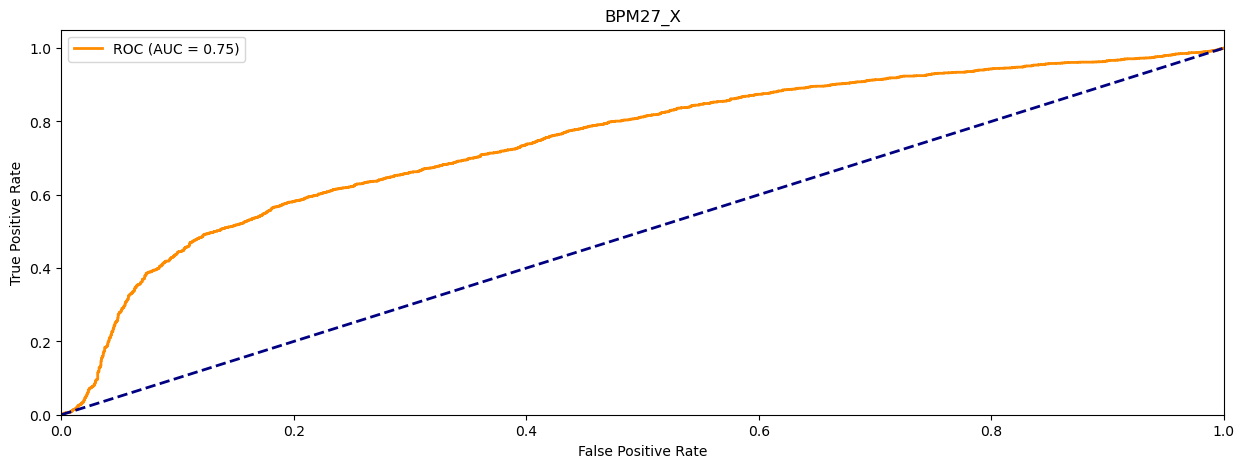

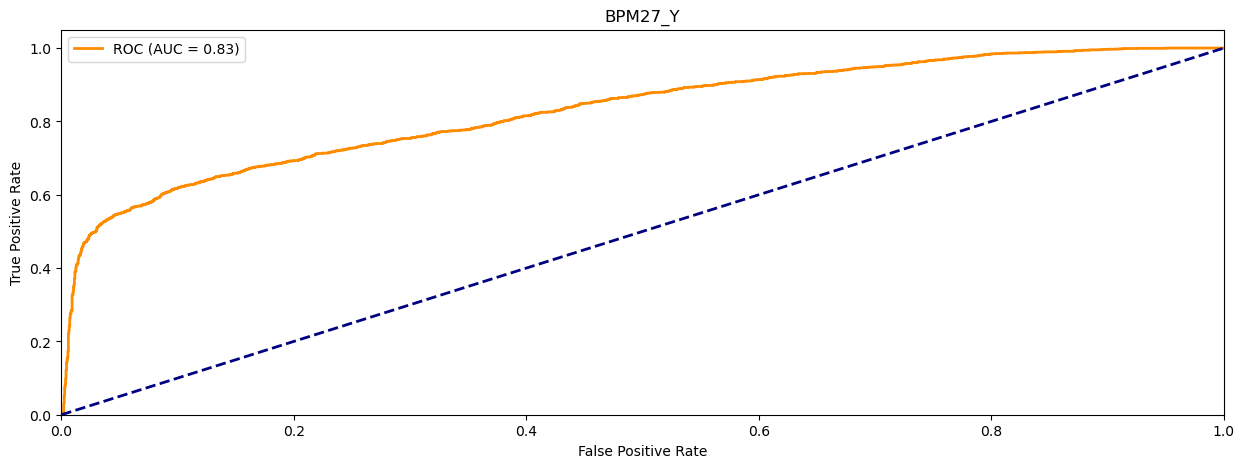

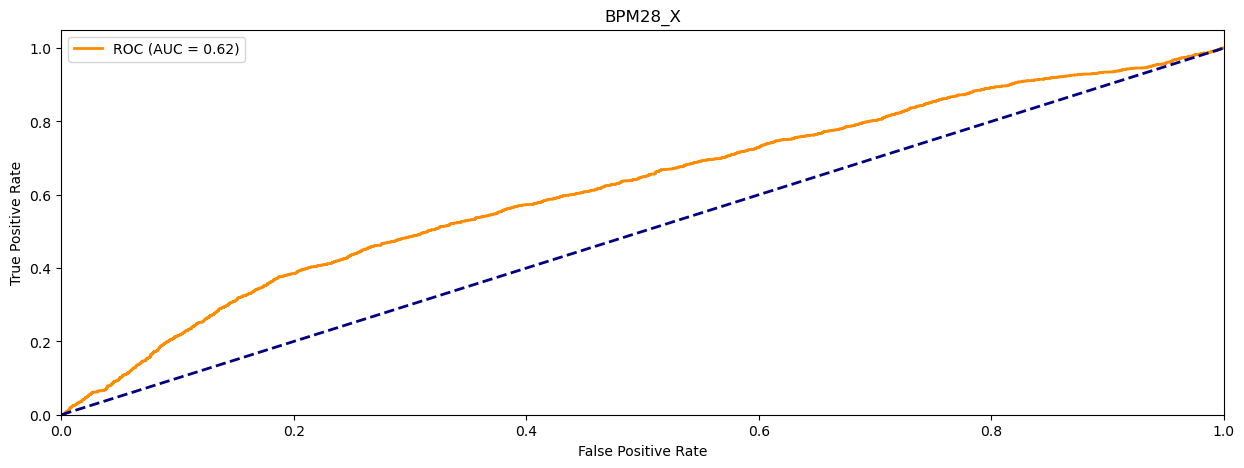

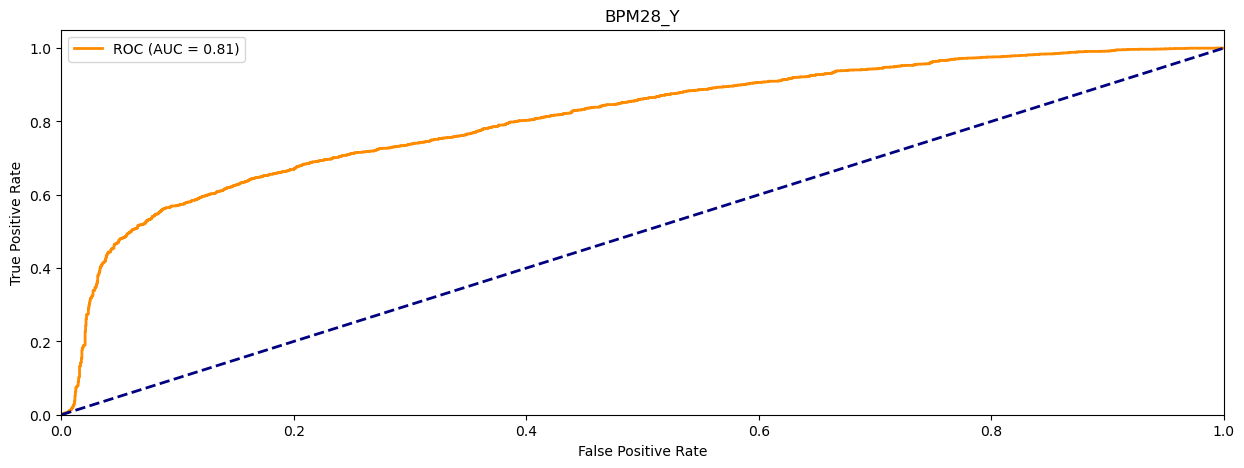

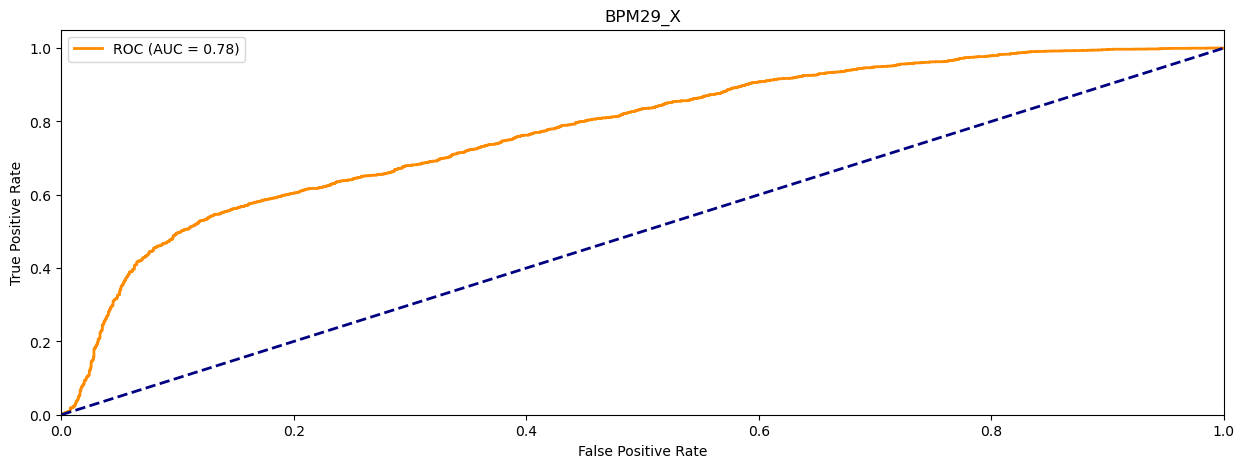

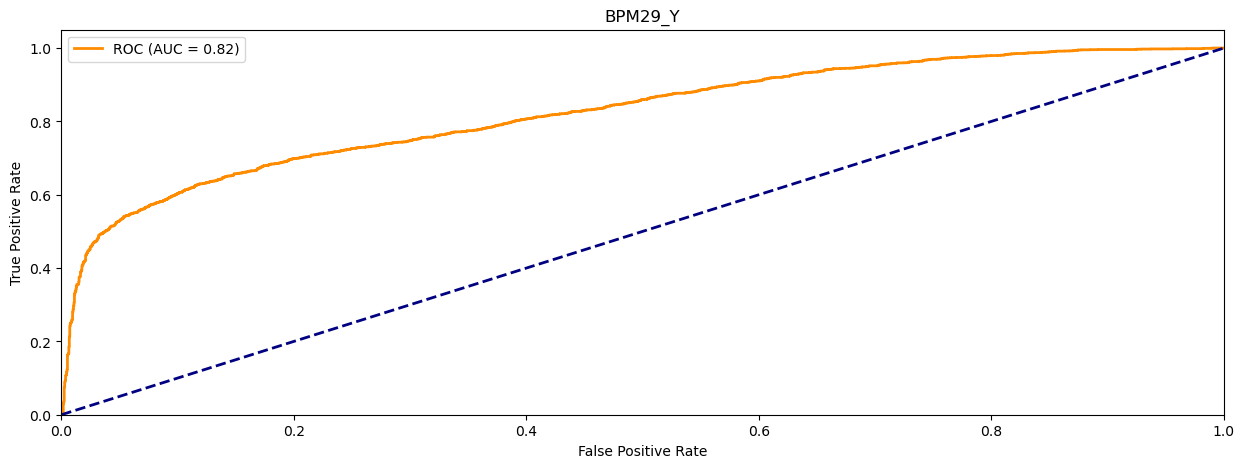

In [8]:

# print(y_pred)
from sklearn import metrics as sk


validate = np.array(validate)
fpr, tpr, thresholds = sk.roc_curve(vlabels, validate[:,0])
roc_auc = sk.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
validate = np.array(validate)

def ROC_ploter(BPM_name, big, a):

    path = f'/home/jbiernat/ML_BPM/ROC/{str(big)}/{BPM_name[-1]}/'
    os.makedirs(path,exist_ok=True)
    
    fpr, tpr, thresholds = sk.roc_curve(vlabels, validate[:,a])
    
    roc_auc = sk.auc(fpr, tpr)
    
    plt.rc('figure',figsize=(15,5))
    plt.title(f'{BPM_name}')
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (AUC = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.savefig(f'/home/jbiernat/ML_BPM/ROC/{str(big)}/{BPM_name[-1]}/{BPM_name}_ROC_{str(big)}.png')
    plt.show()


for j, i in enumerate(keyGen):
    ROC_ploter(i,slector,j)

In [9]:
y_pred[:,1] > 0.7 

array([False, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [10]:
from itertools import accumulate
#plt.rc('figure',figsize=(15,5)) 
#plt.bar((y_pred[:,1] > 0.7), height=10**3)
#plt.title(f'{BPM_name}')
#plt.xlabel("Score")
#plt.ylabel("Num of Score")
#plt.legend(loc="upper left")
#plt.show()

df = pd.DataFrame((y_pred[:,1] > 0.7))
df1 = df.apply(pd.value_counts)

In [11]:
#df1.plot.bar()
display(df1)

,0
0,
False,752
True,248


In [12]:
df1_T = df1.T

In [13]:
display(df1_T)

,False,True
0,752,248


Index([False, True], dtype='bool', name=0)


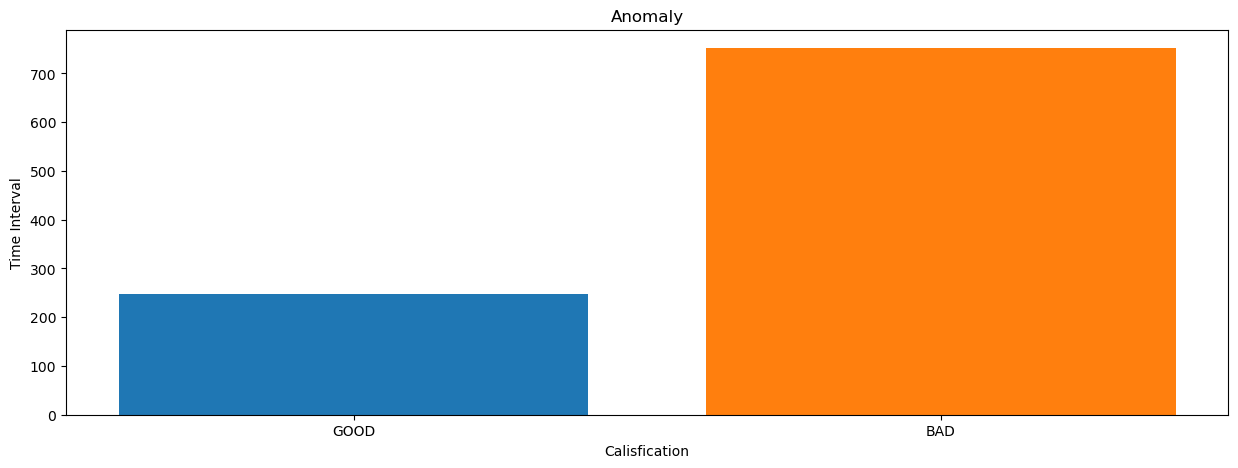

In [14]:
print(df1_T.keys())
plt.rc('figure',figsize=(15,5)) 
fig, ax = plt.subplots()
ax.bar('GOOD',height = df1_T[True])
ax.bar('BAD',height = df1_T[False])
#ax.plot(results['validation_1']['logloss'], label='Test')
#ax.legend()
plt.ylabel('Time Interval')
plt.xlabel('Calisfication')
plt.title('Anomaly')
plt.show()